# Dataset 1: UNICEF - Education of Children with Disabilities 

## Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading the spreadsheets in the excel file

In [2]:
#Reading the spreadsheets in the excel file
xls = pd.ExcelFile("unicefeducation_data.xlsx")
dfPrimary = pd.read_excel(xls,"1. ANAR_Primary")
dfLowerSecondary = pd.read_excel(xls,"2. ANAR_Lower secondary")
dfUpperSecondary = pd.read_excel(xls,"3. ANAR_Upper secondary")
dfOOSPrimary = pd.read_excel(xls,'4. OOS_Primary')
dfOOSLowerSecondary = pd.read_excel(xls,"5. OOS_Lower Secondary")
dfOOSUpperSecondary = pd.read_excel(xls,"6. OOS_Upper secondary")
dfCompletionPrimary = pd.read_excel(xls,"7. Completion_Primary")
dfFoundationReadingSkills = pd.read_excel(xls,"8. Foundational reading skill")
dfFoundationNumericalSkill = pd.read_excel(xls,"9. Foundational numeracy skill")


In [3]:
#Preview data information
dfPrimary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Countries and areas                       160 non-null    object
 1   ISO Code                                  145 non-null    object
 2   Region                                    160 non-null    object
 3   Sub-region                                160 non-null    object
 4   Development regions                       155 non-null    object
 5   Indicator                                 160 non-null    object
 6   Category                                  160 non-null    object
 7   Total                                     161 non-null    object
 8   Unnamed: 8                                161 non-null    object
 9   Unnamed: 9                                161 non-null    object
 10  Children without functional difficulties  160 non-

---

## Data Preprocessing

### Drop and rename columns

In [4]:
#Drop and rename columns
listofDF = [dfPrimary,dfLowerSecondary,dfUpperSecondary,dfOOSPrimary,dfOOSLowerSecondary,dfOOSUpperSecondary,dfCompletionPrimary,dfFoundationReadingSkills,dfFoundationNumericalSkill]

for data in listofDF:
    data.rename(columns={"Total": "Total for Point Estimate", "Unnamed: 8": "Total for Upper Limit", "Unnamed: 9": "Total for Lower Limit", "Children without functional difficulties": "CWOFD for Point Estimate", "Unnamed: 11": "CWOFD for Upper Limit", "Unnamed: 12": "CWOFD for Lower Limit", "Children with functional difficulties": "CWFD for Point Estimate", "Unnamed: 14": "CWFD for Upper Limit", "Unnamed: 15": "CWFD for Lower Limit"}, inplace = True)
    data.drop(index=0, inplace=True)
    data.drop(['ISO Code','Sub-region','Time period','Data source'], axis='columns', inplace=True)

### Merging the data

In [5]:
#Merging data
df_unicef = pd.concat(listofDF)
df_unicef.reset_index(drop=True, inplace=True)
df_unicef

,Countries and areas,Region,Development regions,Indicator,Category,Total for Point Estimate,Total for Upper Limit,Total for Lower Limit,CWOFD for Point Estimate,CWOFD for Upper Limit,CWOFD for Lower Limit,CWFD for Point Estimate,CWFD for Upper Limit,CWFD for Lower Limit
0,Bangladesh,SA,Least Developed,ANAR Primary,Total,82.7,83.3,82.1,83.7,84.3,83.1,72.1,74.6,69.6
1,Bangladesh,SA,Least Developed,ANAR Primary,Male,80.1,81,79.2,81.4,82.3,80.5,68.1,71.5,64.6
2,Bangladesh,SA,Least Developed,ANAR Primary,Female,85.3,86.1,84.5,86,86.9,85.2,76.8,80.2,73.3
3,Bangladesh,SA,Least Developed,ANAR Primary,Urban,84.3,85.6,82.9,84.9,86.3,83.6,76.1,81.8,70.3
4,Bangladesh,SA,Least Developed,ANAR Primary,Rural,82.2,82.9,81.5,83.3,84,82.7,71.2,73.9,68.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Zimbabwe,SSA,Less Developed,Foundational numeracy skill,Total,24.6,25.9,23.3,25.3,26.7,23.9,18.4,22.2,14.6
1436,Zimbabwe,SSA,Less Developed,Foundational numeracy skill,Male,22.5,24.3,20.8,23.1,25,21.3,17.7,22.7,12.6
1437,Zimbabwe,SSA,Less Developed,Foundational numeracy skill,Female,26.8,28.7,24.9,27.5,29.6,25.5,19.3,25.2,13.4
1438,Zimbabwe,SSA,Less Developed,Foundational numeracy skill,Urban,41.4,44.1,38.6,41.7,44.6,38.9,37.8,47.7,27.8


In [6]:
#Preview of data
df_unicef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Countries and areas       1440 non-null   object
 1   Region                    1440 non-null   object
 2   Development regions       1395 non-null   object
 3   Indicator                 1440 non-null   object
 4   Category                  1440 non-null   object
 5   Total for Point Estimate  1430 non-null   object
 6   Total for Upper Limit     1430 non-null   object
 7   Total for Lower Limit     1430 non-null   object
 8   CWOFD for Point Estimate  1387 non-null   object
 9   CWOFD for Upper Limit     1387 non-null   object
 10  CWOFD for Lower Limit     1387 non-null   object
 11  CWFD for Point Estimate   985 non-null    object
 12  CWFD for Upper Limit      985 non-null    object
 13  CWFD for Lower Limit      985 non-null    object
dtypes: object(14)
memory usa

### Checking for missing values

In [7]:
#Checking missing values
df_unicef.isnull().sum()

Countries and areas           0
Region                        0
Development regions          45
Indicator                     0
Category                      0
Total for Point Estimate     10
Total for Upper Limit        10
Total for Lower Limit        10
CWOFD for Point Estimate     53
CWOFD for Upper Limit        53
CWOFD for Lower Limit        53
CWFD for Point Estimate     455
CWFD for Upper Limit        455
CWFD for Lower Limit        455
dtype: int64

In [8]:
#Checking which rows have zero values for any of the numerical columns 
df_zeroval = df_unicef[(df_unicef['Total for Point Estimate'] == 0) | (df_unicef['Total for Upper Limit'] == 0) | 
(df_unicef['Total for Lower Limit'] == 0) | (df_unicef['CWOFD for Point Estimate'] == 0) | 
(df_unicef['CWOFD for Upper Limit'] == 0) | (df_unicef['CWOFD for Lower Limit']== 0) | 
(df_unicef['CWFD for Point Estimate']== 0) | (df_unicef['CWFD for Upper Limit']== 0) | (df_unicef['CWFD for Lower Limit']== 0)]

df_zeroval

,Countries and areas,Region,Development regions,Indicator,Category,Total for Point Estimate,Total for Upper Limit,Total for Lower Limit,CWOFD for Point Estimate,CWOFD for Upper Limit,CWOFD for Lower Limit,CWFD for Point Estimate,CWFD for Upper Limit,CWFD for Lower Limit
236,Mongolia,EAP,Less Developed,ANAR Lower Secondary,Male,1.3,2,0.6,1.3,2.1,0.6,0,0,0
239,Mongolia,EAP,Less Developed,ANAR Lower Secondary,Rural,0.1,0.4,-0.1,0.2,0.4,-0.1,0,0,0
330,Central African Republic,SSA,Least Developed,ANAR Upper secondary,Total,3.3,5.2,1.5,4.4,6.8,2,0,0,0
332,Central African Republic,SSA,Least Developed,ANAR Upper secondary,Female,3.8,6.5,1.1,5.2,8.9,1.5,0,0,0
334,Central African Republic,SSA,Least Developed,ANAR Upper secondary,Rural,0,0,0,0,0,0,0,0,0
355,Guinea-Bissau,SSA,Least Developed,ANAR Upper secondary,Total,0.1,0.3,-0.1,0.1,0.3,-0.1,0,0,0
356,Guinea-Bissau,SSA,Least Developed,ANAR Upper secondary,Male,0,0,0,0,0,0,NaN,NaN,NaN
357,Guinea-Bissau,SSA,Least Developed,ANAR Upper secondary,Female,0.2,0.5,-0.2,0.2,0.6,-0.2,0,0,0
359,Guinea-Bissau,SSA,Least Developed,ANAR Upper secondary,Rural,0,0,0,0,0,0,0,0,0
602,Suriname,LAC,Less Developed,OOS Primary,Female,2.4,3.4,1.4,2.7,3.8,1.6,0,0,0


In [9]:
#Filling null values and zero values with the mean based on indicator and category
listforFillingMean = ['Total for Point Estimate', 'Total for Upper Limit', 'Total for Lower Limit', 'CWOFD for Point Estimate', 'CWOFD for Upper Limit', 'CWOFD for Lower Limit', 'CWFD for Point Estimate', 'CWFD for Upper Limit', 'CWFD for Lower Limit']

for col in listforFillingMean:
    for i in df_unicef.Indicator.unique():
        for j in df_unicef.Category.unique():
            mean_val = round(df_unicef[(df_unicef['Indicator'] == i) & (df_unicef['Category'] == j)][col].mean(),1)
            df_unicef.loc[((df_unicef['Indicator'] == i) & (df_unicef['Category'] == j)),col] = df_unicef.loc[((df_unicef['Indicator'] == i) & (df_unicef['Category'] == j)), col].fillna(mean_val)
            df_unicef.loc[((df_unicef['Indicator'] == i) & (df_unicef['Category'] == j)),col] = df_unicef.loc[((df_unicef['Indicator'] == i) & (df_unicef['Category'] == j)), col].replace(0.0,mean_val)

In [10]:
#Filling the null values in development region
df_unicef['Development regions'].fillna('Not Classified', inplace=True)

In [11]:
#Checking after null values have been filled
df_unicef.isnull().sum()

Countries and areas         0
Region                      0
Development regions         0
Indicator                   0
Category                    0
Total for Point Estimate    0
Total for Upper Limit       0
Total for Lower Limit       0
CWOFD for Point Estimate    0
CWOFD for Upper Limit       0
CWOFD for Lower Limit       0
CWFD for Point Estimate     0
CWFD for Upper Limit        0
CWFD for Lower Limit        0
dtype: int64

### Checking for Outliers

<AxesSubplot:>

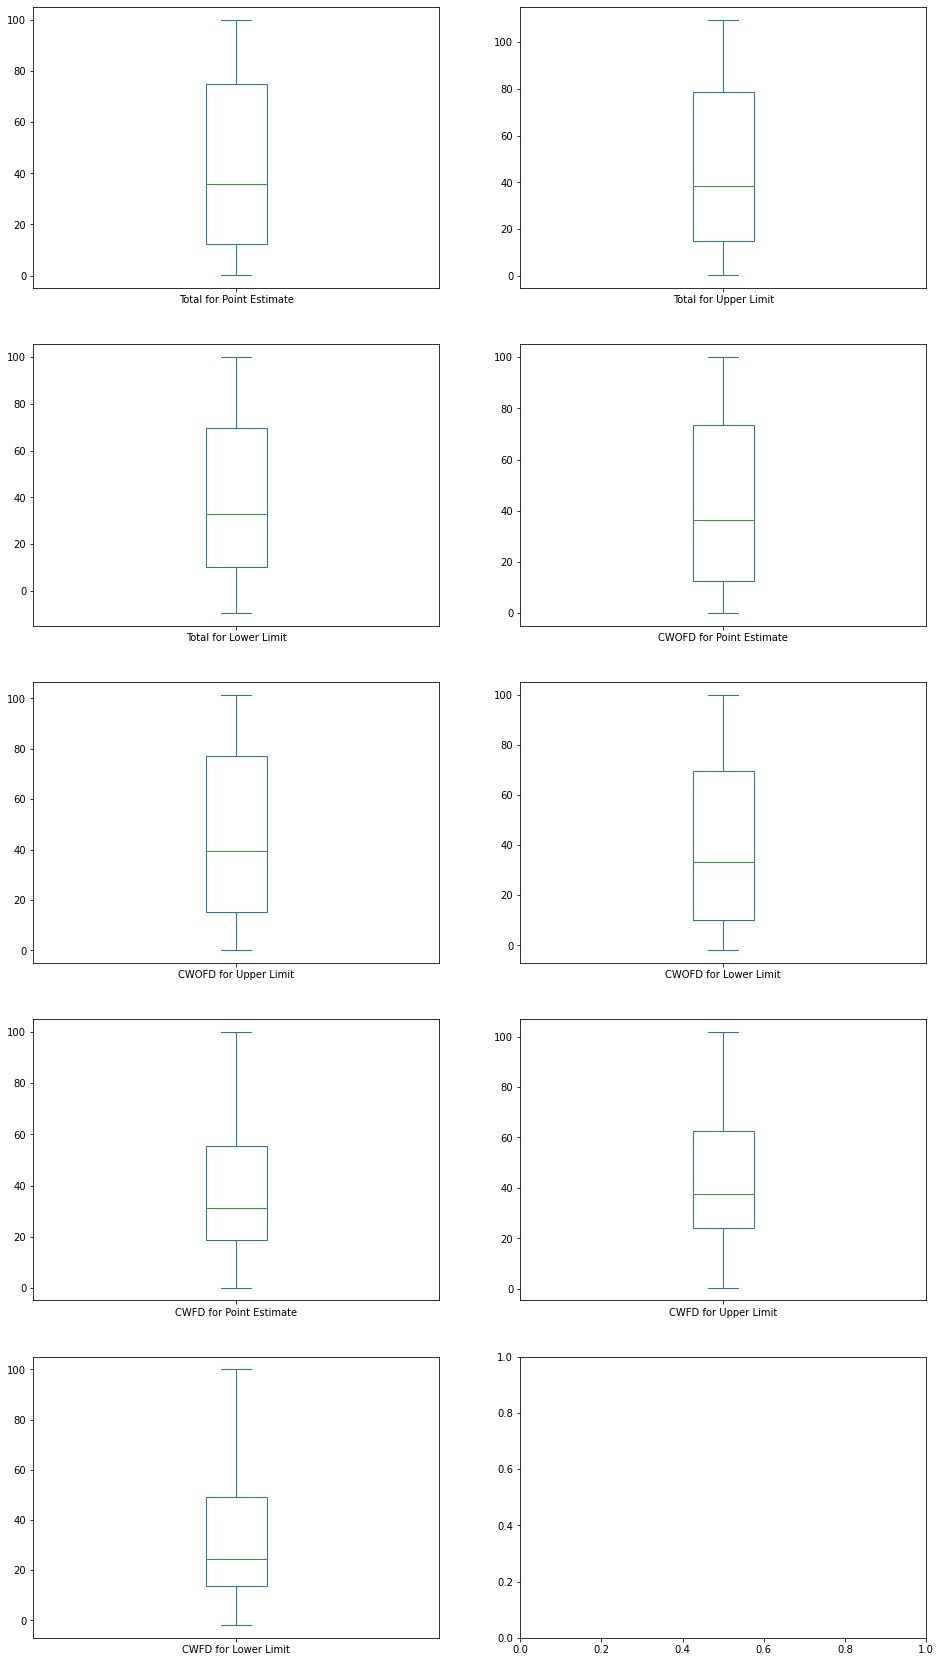

In [12]:
#Checking for outliers 

#Create a figure and axes
fix1,ax1 = plt.subplots(5,2,figsize=(16,30))

#Plot boxplot for the numerical variables
df_unicef["Total for Point Estimate"].plot.box(ax=ax1[0][0])
df_unicef["Total for Upper Limit"].plot.box(ax=ax1[0][1])
df_unicef["Total for Lower Limit"].plot.box(ax=ax1[1][0])

df_unicef["CWOFD for Point Estimate"].plot.box(ax=ax1[1][1])
df_unicef["CWOFD for Upper Limit"].plot.box(ax=ax1[2][0])
df_unicef["CWOFD for Lower Limit"].plot.box(ax=ax1[2][1])

df_unicef["CWFD for Point Estimate"].plot.box(ax=ax1[3][0])
df_unicef["CWFD for Upper Limit"].plot.box(ax=ax1[3][1])
df_unicef["CWFD for Lower Limit"].plot.box(ax=ax1[4][0])

### Checking for the data types

In [13]:
#Checking for data types
df_unicef.dtypes

Countries and areas         object
Region                      object
Development regions         object
Indicator                   object
Category                    object
Total for Point Estimate    object
Total for Upper Limit       object
Total for Lower Limit       object
CWOFD for Point Estimate    object
CWOFD for Upper Limit       object
CWOFD for Lower Limit       object
CWFD for Point Estimate     object
CWFD for Upper Limit        object
CWFD for Lower Limit        object
dtype: object

In [14]:
#Converting the data type in numerical columns from object to float 
numerical_columns = ['Total for Point Estimate', 'Total for Upper Limit', 'Total for Lower Limit', 'CWOFD for Point Estimate', 'CWOFD for Upper Limit', 'CWOFD for Lower Limit', 'CWFD for Point Estimate', 'CWFD for Upper Limit', 'CWFD for Lower Limit']
df_unicef[numerical_columns] = df_unicef[numerical_columns].astype('float64')

In [15]:
#Checking if the data type is correctly converted
df_unicef.dtypes

Countries and areas          object
Region                       object
Development regions          object
Indicator                    object
Category                     object
Total for Point Estimate    float64
Total for Upper Limit       float64
Total for Lower Limit       float64
CWOFD for Point Estimate    float64
CWOFD for Upper Limit       float64
CWOFD for Lower Limit       float64
CWFD for Point Estimate     float64
CWFD for Upper Limit        float64
CWFD for Lower Limit        float64
dtype: object

---

## Exploratory Data Analysis

After cleaning the data, we analyzed the data in "dataset.xlsx"

### Descriptive statistics

In [16]:
df_unicef.describe()

,Total for Point Estimate,Total for Upper Limit,Total for Lower Limit,CWOFD for Point Estimate,CWOFD for Upper Limit,CWOFD for Lower Limit,CWFD for Point Estimate,CWFD for Upper Limit,CWFD for Lower Limit
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.00000,1440.000000,1440.000000,1440.000000
mean,43.112153,45.899931,40.357222,43.064236,45.772917,40.33750,37.642917,43.342986,31.991736
std,33.137531,33.466449,32.991369,32.911250,33.133774,32.82016,25.694947,26.307859,25.256119
min,0.100000,0.300000,-9.400000,0.100000,0.100000,-1.90000,0.200000,0.500000,-1.800000
25%,12.400000,14.800000,10.100000,12.700000,15.400000,10.30000,18.775000,23.950000,13.600000
50%,35.850000,38.500000,33.000000,36.500000,39.300000,33.30000,31.300000,37.550000,24.500000
75%,74.825000,78.425000,69.700000,73.500000,77.125000,69.35000,55.300000,62.425000,49.100000
max,100.000000,109.400000,100.000000,100.000000,101.500000,100.00000,100.000000,101.800000,100.000000


### Distribution of data

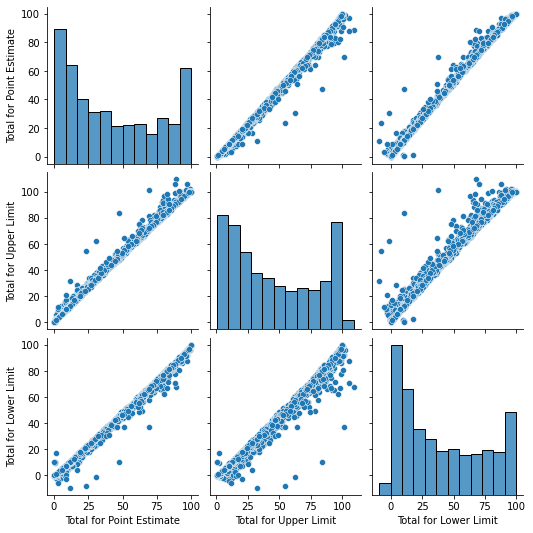

In [17]:
sns.pairplot(df_unicef[['Total for Point Estimate','Total for Upper Limit', 'Total for Lower Limit']])

### Distribution of data

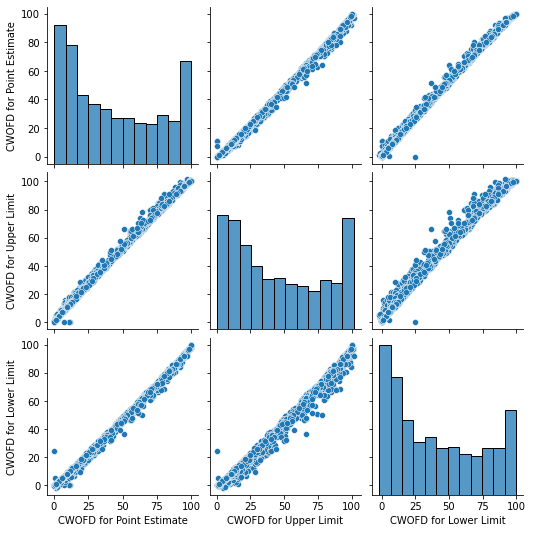

In [18]:
sns.pairplot(df_unicef[['CWOFD for Point Estimate','CWOFD for Upper Limit', 'CWOFD for Lower Limit']])

### Distribution of data

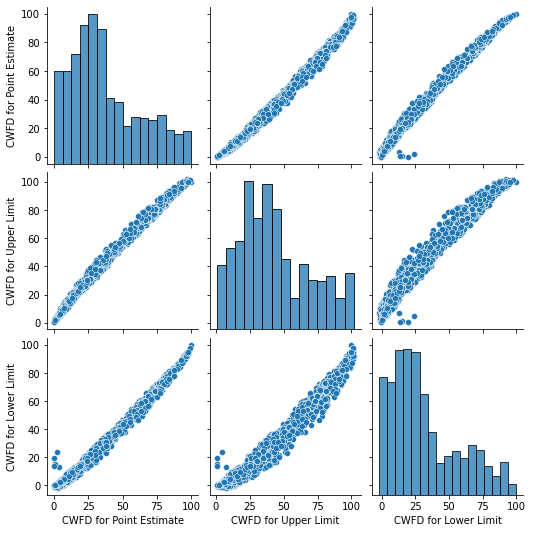

In [19]:
sns.pairplot(df_unicef[['CWFD for Point Estimate','CWFD for Upper Limit', 'CWFD for Lower Limit']])

### Children With and Without Functional Difficulties Point Estimate for Completion rate primary

<AxesSubplot:xlabel='CWOFD for Point Estimate', ylabel='Count'>

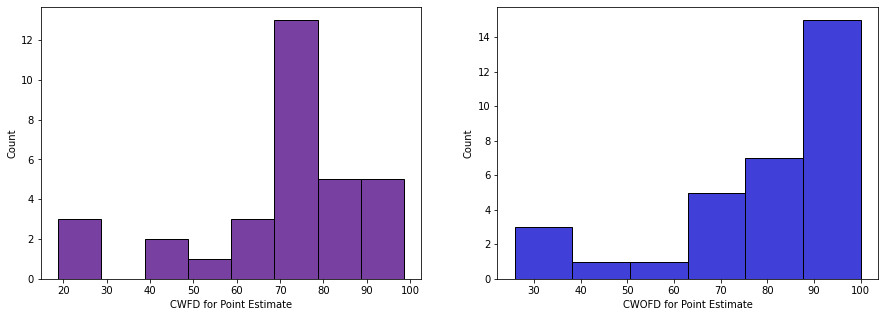

In [20]:
fix1,ax1 = plt.subplots(1,2,figsize=(15,5))

sns.histplot(x=df_unicef[(df_unicef['Indicator'] == 'Completion rate primary') & (df_unicef['Category'] == 'Total')]["CWFD for Point Estimate"], data=df_unicef, ax=ax1[0],color='indigo')
sns.histplot(x=df_unicef[(df_unicef['Indicator'] == 'Completion rate primary') & (df_unicef['Category'] == 'Total')]["CWOFD for Point Estimate"], data=df_unicef, ax=ax1[1],color='mediumblue')                                        

Based on the histogram, children without functional difficulties have a majority percentage of point estimate around 90% to 100% compared to the majority of children with functional difficulties which is around 70% to 80% for completion rate of primary. 

### Frequency of Countries and Areas in Development Regions


<AxesSubplot:xlabel='Development regions', ylabel='nunique'>

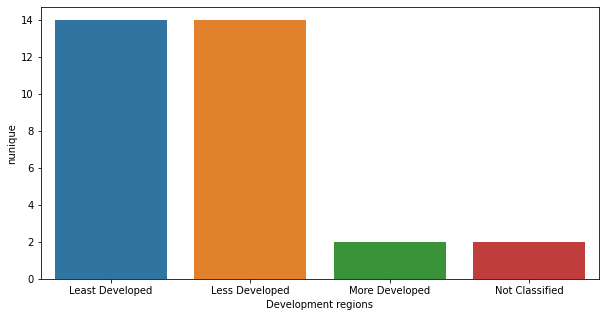

In [21]:
df_dr = pd.DataFrame(df_unicef.groupby('Development regions')['Countries and areas'].agg(['nunique']))
df_dr.reset_index(inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_dr['Development regions'], y=df_dr['nunique'], data=df_dr) 

This histogram shows the development regions. According to the histogram, most of the data is at "Least Developed" and "Less Developed". The "More Developed" and "Not Classified" are of value 2.

### Children With Functional Difficulties Point Estimate by Category


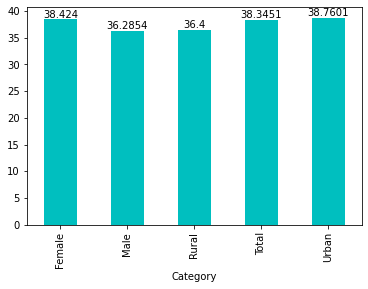

In [22]:
group_cwfd = df_unicef.groupby('Category')['CWFD for Point Estimate'].mean()

df_cat_cwfd = pd.DataFrame(group_cwfd)
ax = df_cat_cwfd.plot(kind='bar', legend=False, color = 'c')
label = ax.bar_label(ax.containers[0], label_type='edge')

Based on the barplot, it can be seen that ‘Urban’ has a higher percentage compared to the ‘Rural’ category. Moreover, ‘Female’ has a higher percentage compared to the ‘Male’ category. 

### Children With Functional Difficulties Point Estimate by Gender

<AxesSubplot:xlabel='CWFD for Point Estimate', ylabel='Category'>

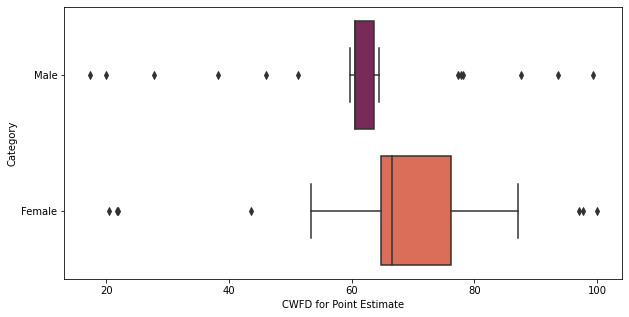

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(y= df_unicef[(df_unicef["Category"] == "Male") | (df_unicef["Category"] == "Female")]["Category"], x= df_unicef[df_unicef['Indicator'] == 'Completion rate primary']["CWFD for Point Estimate"],data = df_unicef, palette="rocket")

1. Location: The median for ‘Female’ point estimate is around 66 while the median for the ‘Male’ point estimate is towards the lower side of the box around 60. Both boxes are overlapping.
2. Shape: The distribution for female and male is skewed to the right.
3. Outliers: There are many lower and upper outliers present for both boxplots.
4. Spread: The ‘Female’ point estimate is spread wider than ‘Male’ point estimate.


### Children With and Without Functional Difficulties Point Estimate by Foundational Learning Skills 


<AxesSubplot:xlabel='Indicator', ylabel='CWOFD for Point Estimate'>

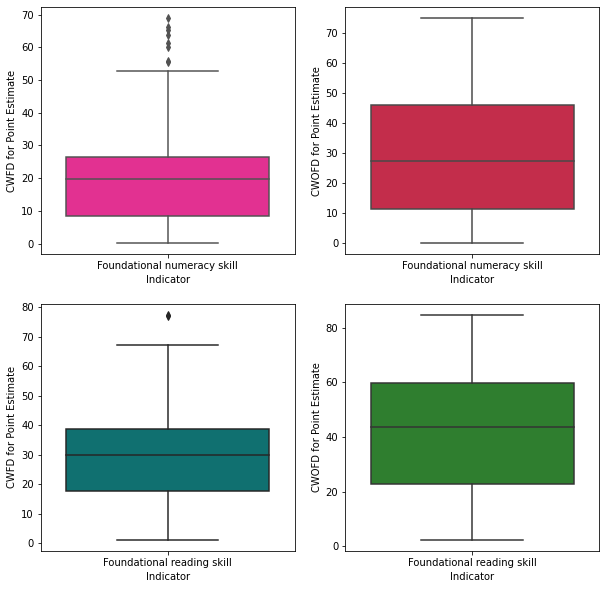

In [24]:
fix1,ax1 = plt.subplots(2,2, figsize=(10,10))

sns.boxplot(x=df_unicef[df_unicef['Indicator'] == 'Foundational numeracy skill']['Indicator'], y=df_unicef["CWFD for Point Estimate"] ,data = df_unicef, ax=ax1[0][0], color="deeppink")
sns.boxplot(x=df_unicef[df_unicef['Indicator'] == 'Foundational numeracy skill']['Indicator'], y=df_unicef["CWOFD for Point Estimate"] ,data = df_unicef, ax=ax1[0][1], color="crimson")
sns.boxplot(x=df_unicef[df_unicef['Indicator'] == 'Foundational reading skill']['Indicator'], y=df_unicef["CWFD for Point Estimate"] ,data = df_unicef, ax=ax1[1][0], color="teal")
sns.boxplot(x=df_unicef[df_unicef['Indicator'] == 'Foundational reading skill']['Indicator'], y=df_unicef["CWOFD for Point Estimate"] ,data = df_unicef, ax=ax1[1][1], color="forestgreen")


##### Foundational numeracy skill
1. Location: The median for CWFD for Point Estimate is around 20 while the median for the CWOFD for Point Estimate is around 28. Both boxes are overlapping.
2. Shape: The distribution for CWFD for Point Estimate is skewed to the left while CWOFD for Point Estimate is skewed to the right.
3. Outliers: There are some upper outliers for CWFD for Point Estimate and no outliers for CWOFD for Point Estimate.
4. Spread: The spreadness wider for CWOFD for Point Estimate compared to CWFD for Point Estimate.<br>

##### Foundational reading skill
1. Location: The median for CWFD for Point Estimate is around 30 while the median for the CWOFD for Point Estimate is around 42. Both boxes are overlapping.
2. Shape: Both distribution for CWFD for Point Estimate and CWOFD for Point Estimate is skewed to the left.
3. Outliers: There is one upper outlier for CWFD for Point Estimate and no outliers for CWOFD for Point Estimate.
4. Spread: The spreadness wider for CWOFD for Point Estimate compared to CWFD for Point Estimate.


### Correlation of data


<AxesSubplot:>

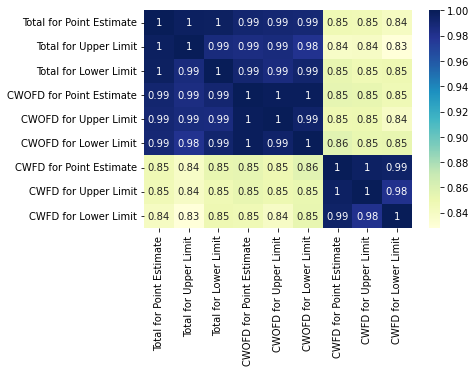

In [25]:
sns.heatmap(df_unicef.corr(),annot=True,cmap="YlGnBu")

Based on the heatmap above, it can be observed that all of the numerical columns are generally highly correlated among each other as the range of correlation is between 0.8 and 1.

---

## Data Mining/Data Modelling

##### Predictive question:
- What category of children (with disabilities or without disabilities) will have a higher percentage of achieving minimum proficiency based on the attributes of a country?

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


In [27]:
df_fns = df_unicef[(df_unicef['Indicator'] == 'Foundational numeracy skill') | (df_unicef['Indicator'] == 'Foundational reading skill')].copy()
df_fns['Target'] = df_fns.apply(lambda x: 1 if x['CWOFD for Point Estimate'] > x['CWFD for Point Estimate'] else 0, axis = 1)
df_fns.drop(['Countries and areas'],axis=1, inplace=True)
df_fns[['CWOFD for Point Estimate','CWFD for Point Estimate','Target']].head(5)

,CWOFD for Point Estimate,CWFD for Point Estimate,Target
1120,50.0,35.7,1
1121,46.4,31.3,1
1122,53.3,40.7,1
1123,56.7,42.6,1
1124,48.2,34.4,1


In [28]:
df_pred = pd.get_dummies(df_fns, columns = ['Region', 'Development regions','Category','Indicator'])
df_pred

,Total for Point Estimate,Total for Upper Limit,Total for Lower Limit,CWOFD for Point Estimate,CWOFD for Upper Limit,CWOFD for Lower Limit,CWFD for Point Estimate,CWFD for Upper Limit,CWFD for Lower Limit,Target,...,Development regions_Less Developed,Development regions_More Developed,Development regions_Not Classified,Category_Female,Category_Male,Category_Rural,Category_Total,Category_Urban,Indicator_Foundational numeracy skill,Indicator_Foundational reading skill
1120,48.8,49.5,48.2,50.0,50.7,49.3,35.7,38.1,33.4,1,...,0,0,0,0,0,0,1,0,0,1
1121,45.1,46.0,44.1,46.4,47.4,45.4,31.3,34.4,28.3,1,...,0,0,0,0,1,0,0,0,0,1
1122,52.4,53.3,51.5,53.3,54.3,52.4,40.7,44.2,37.2,1,...,0,0,0,1,0,0,0,0,0,1
1123,55.8,57.3,54.3,56.7,58.2,55.2,42.6,48.6,36.7,1,...,0,0,0,0,0,0,0,1,0,1
1124,47.0,47.7,46.3,48.2,48.9,47.4,34.4,36.9,31.9,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,24.6,25.9,23.3,25.3,26.7,23.9,18.4,22.2,14.6,1,...,1,0,0,0,0,0,1,0,1,0
1436,22.5,24.3,20.8,23.1,25.0,21.3,17.7,22.7,12.6,1,...,1,0,0,0,1,0,0,0,1,0
1437,26.8,28.7,24.9,27.5,29.6,25.5,19.3,25.2,13.4,1,...,1,0,0,1,0,0,0,0,1,0
1438,41.4,44.1,38.6,41.7,44.6,38.9,37.8,47.7,27.8,1,...,1,0,0,0,0,0,0,1,1,0


In [29]:
X = df_pred.drop("Target", axis=1)
y = df_pred["Target"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = LogisticRegression(max_iter=300)
print('Cross validation score: ',cross_val_score(model, X, y, cv=3))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model_accuracy = "{:.2f}".format(accuracy_score(y_test, y_pred))

print('Accuracy score:', model_accuracy,'\n')
print(classification_report(y_test, y_pred, zero_division=0))

Cross validation score:  [0.95327103 0.97196262 0.96226415]
Accuracy score: 0.90 

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.90      0.99      0.94        84

    accuracy                           0.90        96
   macro avg       0.83      0.62      0.66        96
weighted avg       0.88      0.90      0.87        96



Based on the results, we have obtained an accuracy of 90%.

<AxesSubplot:>

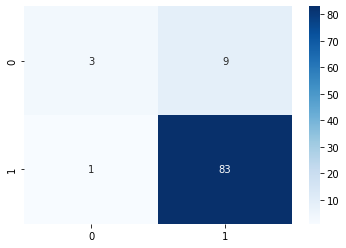

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

0: Children with functional difficulties

1: Children without functional difficulties

Based on the confusion matrix, most of the values in the category ‘Children without functional difficulties’ have been predicted correctly. There are only a few values predicted correctly for  ‘Children with functional difficulties’. 

---

## Data Visualization

##### Descriptive question
- What is the mean percentage of children that completed their primary education based on gender and living area?

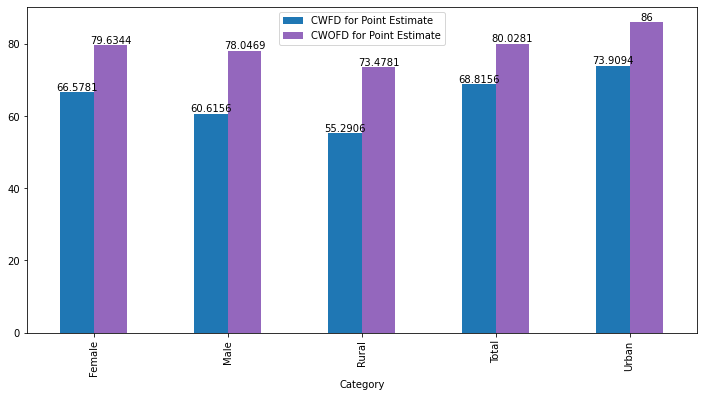

In [32]:
df_cwfd = pd.DataFrame(df_unicef[df_unicef['Indicator'] == 'Completion rate primary'].groupby('Category')['CWFD for Point Estimate'].mean())
df_cwofd = pd.DataFrame(df_unicef[df_unicef['Indicator'] == 'Completion rate primary'].groupby('Category')['CWOFD for Point Estimate'].mean())

fig1,ax1 = plt.subplots(figsize=(12,6))
df_merge = pd.merge(df_cwfd, df_cwofd, on=['Category'])
df_merge.plot(kind='bar',ax=ax1, color=['tab:blue', 'tab:purple'])
plt.legend(loc = 'upper center')
bar1 = ax1.bar_label(ax1.containers[0], label_type='edge')
bar2 = ax1.bar_label(ax1.containers[1], label_type='edge')


For children with functional difficulties point estimate, female has a higher mean percentage compared to male whereas urban has a higher mean percentage compared to rural. The same pattern can be observed for children without functional difficulties point estimate.

##### Exploratory question:
- What is the relationship between a development region of a country and the percentage of children with functional difficulties?

<AxesSubplot:xlabel='Development regions', ylabel='CWOFD for Point Estimate'>

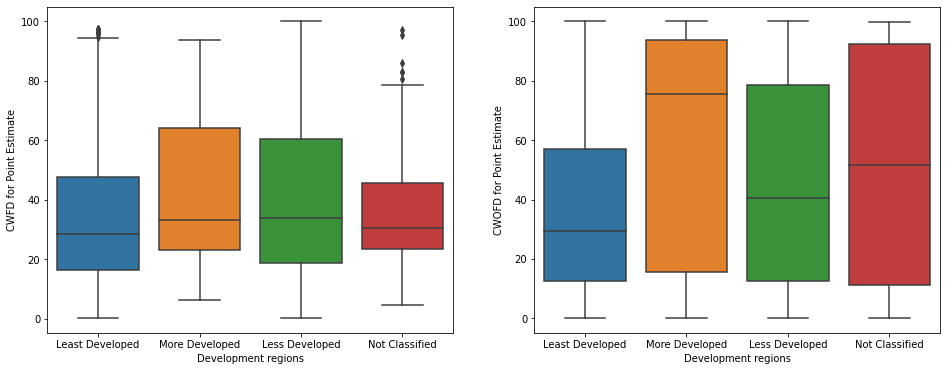

In [33]:
fig2, ax2= plt.subplots (1,2, figsize = (16,6))
sns.boxplot(x='Development regions',y='CWFD for Point Estimate', data=df_unicef, ax=ax2[0])
sns.boxplot(x='Development regions',y='CWOFD for Point Estimate', data=df_unicef, ax=ax2[1])

As we can see from the graph above, the lower developed a region is, the higher the amount of children with functional difficulties. 

##### Inferential question:
- The point estimate for children with functional difficulties concerning female children in Bangladesh is higher than the male population in Bangladesh.
   
    Is this hypothesis also true for other countries as well?

<AxesSubplot:xlabel='CWFD for Point Estimate', ylabel='Category'>

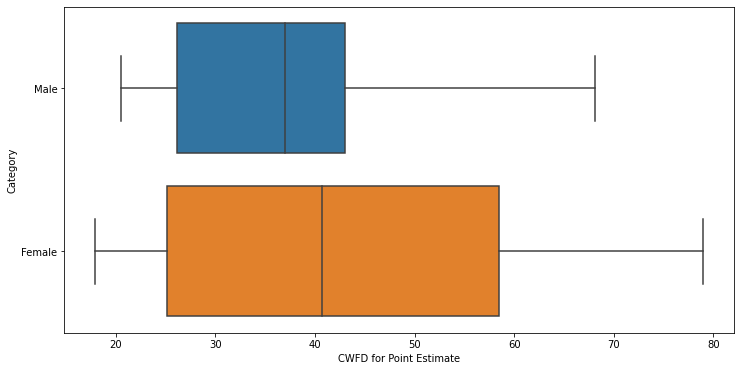

In [34]:
#Check if the statement is true
fig2 = plt.subplots (figsize = (12,6))

sns.boxplot(y= df_unicef[(df_unicef["Category"] == "Male") | (df_unicef["Category"] == "Female")]["Category"], x= df_unicef[df_unicef['Countries and areas'] == 'Bangladesh']["CWFD for Point Estimate"],data = df_unicef)

#Proven

- Location: The median for ‘Male’ point estimate is around 37 while the median for the ‘Female’ point estimate is around 41.
- Shape: The distribution for ‘Male’ is skewed to the left while the distribution for ‘Female’ is approximately symmetrical.
- Outlier: There are no outliers present for both of the boxplots.

Yes, the hypothesis is true. There are more female children with functional difficulties rather than male children in Bangladesh.

<AxesSubplot:xlabel='CWFD for Point Estimate', ylabel='Countries and areas'>

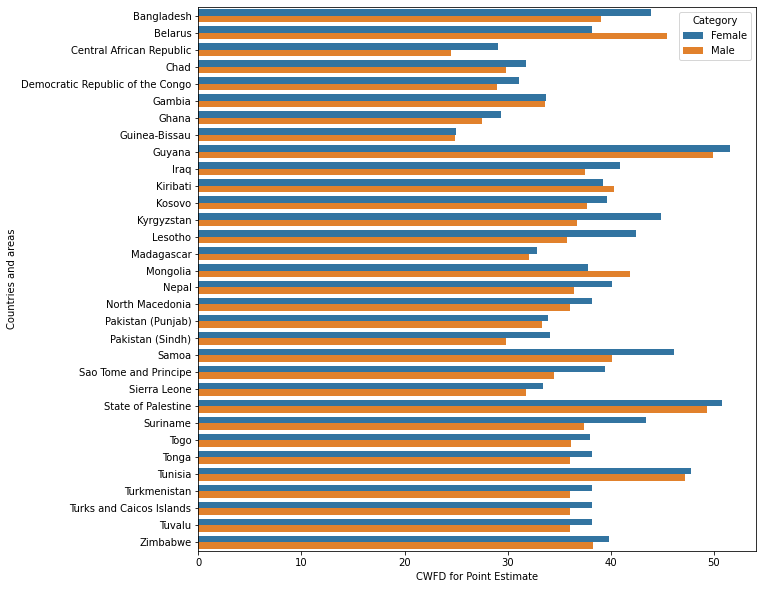

In [35]:
#Check if the question is true
fig1 = plt.subplots (figsize = (10,10))

df_cwfd = pd.DataFrame(df_unicef.groupby(['Category','Countries and areas'],as_index=False)['CWFD for Point Estimate'].mean())
df_fm = df_cwfd[(df_cwfd['Category'] == 'Female') | (df_cwfd['Category'] == 'Male')]
sns.barplot(x = 'CWFD for Point Estimate',
            y = 'Countries and areas',
            hue = 'Category',
            data = df_fm)

#Mostly true

- Most of the countries and areas have more female children with functional difficulties rather than the male children.

- Only 3 out of 32 countries and areas are higher for male regarding children with functional difficulties rather than females. Those countries and areas are Belarus, Guinea-Bissau and Kiribati.

##### Causal question: 
- Will more developed regions affect the average point estimate of children with functional difficulties?

<AxesSubplot:xlabel='Development regions', ylabel='CWFD for Point Estimate'>

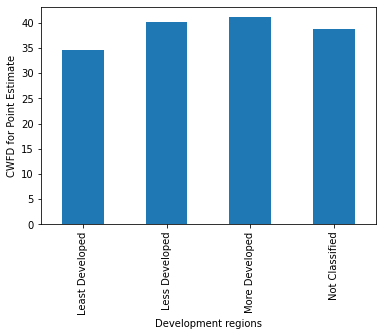

In [36]:
df_unicef.groupby(["Development regions"]).agg({"CWFD for Point Estimate":'mean'}).plot(kind= "bar",legend=False,ylabel="CWFD for Point Estimate")

- The better the development region,the higher the average point estimate of children with functional difficulties.

##### Mechanistic question:
- How does the increase in CWFD for Point Estimate affect the increase in Total for Point Estimate?

<AxesSubplot:>

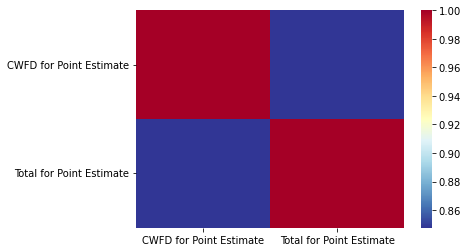

In [37]:
sns.heatmap(df_unicef[["CWFD for Point Estimate","Total for Point Estimate"]].corr(),cmap="RdYlBu_r")

- From the correlation heatmap we can see that CWFD for Point Estimate has a positive relationship with Total for Point Estimate

<AxesSubplot:xlabel='CWFD for Point Estimate', ylabel='Total for Point Estimate'>

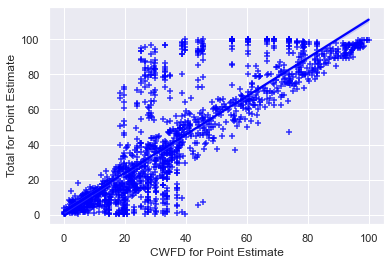

In [38]:
sns.set_theme(color_codes=True)
sns.regplot(x="CWFD for Point Estimate",y="Total for Point Estimate",data=df_unicef,color="blue",marker="+")

- From the plotted regression plot, most of the data points are near the regression line. This indicates that there is a strong postive linear correlation between these two variables.

# Dataset 2: FIFA 21 Dataset 

## Data Collection

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re

### Reading the csv file

In [40]:
df_fifa = pd.read_csv("fifa21 raw data v2.csv")

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\490755815.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fifa = pd.read_csv("fifa21 raw data v2.csv")


In [41]:
#Displaying the head of dataframe
df_fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


---

## Data Preprocessing

In [42]:
#Preview data information
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

### Checking for missing values

In [43]:
#Checking for missing values
df_fifa.isnull().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

### Dropping unnecessary columns

In [44]:
#Irrelevant columns dropped 
df_fifa.drop(['ID', 'Name', 'photoUrl', 'playerUrl', 'Contract', 'Preferred Foot', 'Joined', 'Loan Date End', 'Release Clause', 'W/F', 'SM', 'IR', 'Hits', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],axis=1,inplace=True)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LongName       18979 non-null  object
 1   Nationality    18979 non-null  object
 2   Age            18979 non-null  int64 
 3   ↓OVA           18979 non-null  int64 
 4   POT            18979 non-null  int64 
 5   Club           18979 non-null  object
 6   Positions      18979 non-null  object
 7   Height         18979 non-null  object
 8   Weight         18979 non-null  object
 9   BOV            18979 non-null  int64 
 10  Best Position  18979 non-null  object
 11  Value          18979 non-null  object
 12  Wage           18979 non-null  object
 13  Attacking      18979 non-null  int64 
 14  Skill          18979 non-null  int64 
 15  Movement       18979 non-null  int64 
 16  Power          18979 non-null  int64 
 17  Mentality      18979 non-null  int64 
 18  Defending      18979 non-n

### Renaming the columns

In [45]:
#Rename OVA column
df_fifa.rename(columns = {'↓OVA':'OVA'}, inplace = True)

### Formatting the values

In [46]:
#Changing all the value in 'Height' from feet to cm
df1 = pd.DataFrame(df_fifa[df_fifa["Height"].str.contains("'")]['Height'])
feet = df1['Height'].str.split("'").str[0].astype('float64')
inches = df1['Height'].str.split("'").str[1]
new_inches = inches.str.replace('"', '').astype('float64')
feet = feet * 30.48
new_inches = new_inches * 2.54
new_height = feet + new_inches
new_height

793    187.96
847    190.50
848    195.58
860    180.34
861    193.04
862    185.42
863    182.88
864    185.42
865    180.34
866    187.96
867    182.88
868    190.50
869    182.88
871    177.80
872    175.26
873    180.34
874    167.64
875    185.42
876    182.88
877    193.04
878    170.18
879    182.88
880    180.34
881    180.34
883    182.88
884    177.80
885    190.50
886    182.88
887    162.56
888    180.34
889    175.26
890    170.18
891    182.88
892    177.80
893    187.96
894    187.96
895    190.50
896    170.18
897    177.80
898    175.26
Name: Height, dtype: float64

In [47]:
df1= df_fifa[df_fifa["Height"].str.contains("'")]
df1['Height'].update(new_height)
df1.head()

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\2085713157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Height'].update(new_height)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
793,Miguel Ángel Moyá Rumbo,Spain,36,78,78,\n\n\n\nReal Sociedad,GK,187.96,183lbs,78,...,1216,430,Medium,Medium,82,72,80,78,39,79
847,Martin Škrtel,Slovakia,35,78,78,\n\n\n\nMedipol Başakşehir FK,CB,190.5,179lbs,78,...,1600,344,Medium,High,47,38,48,51,78,82
848,Bas Dost,Netherlands,31,78,78,\n\n\n\nEintracht Frankfurt,ST,195.58,183lbs,78,...,1774,380,Medium,Medium,47,81,57,65,51,79
860,Sérgio Miguel Relvas de Oliveira,Portugal,28,78,78,\n\n\n\nFC Porto,CM,180.34,172lbs,78,...,2067,426,Medium,High,58,77,82,75,66,68
861,Marwin Hitz,Switzerland,32,78,78,\n\n\n\nBorussia Dortmund,GK,193.04,196lbs,78,...,1203,422,Medium,Medium,79,77,63,80,44,79


In [48]:
df_fifa.drop(df_fifa[df_fifa["Height"].str.contains("'")].index,axis = 0,inplace = True)
df_fifa["Height"]=df_fifa["Height"].str.replace("cm","")

In [49]:
df_fifa = df_fifa.append(df1)
df_fifa.head()

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\3757636859.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fifa = df_fifa.append(df1)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",170,72kg,93,...,2231,466,Medium,Low,85,92,91,95,38,65
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",187,83kg,92,...,2221,464,High,Low,89,93,81,89,35,77
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,188,87kg,91,...,1413,489,Medium,Medium,87,92,78,90,52,90
3,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",181,70kg,91,...,2304,485,High,High,76,86,93,88,64,78
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",175,68kg,91,...,2175,451,High,Medium,91,85,86,94,36,59


In [50]:
#Changing all the value in 'Weight' from lbs to kg
df_weight = pd.DataFrame(df_fifa[df_fifa["Weight"].str.contains("lbs")]['Weight'])
weight = df1['Weight'].str.strip("lbs").astype('float64')
new_weight = weight*0.454
new_weight

793    83.082
847    81.266
848    83.082
860    78.088
861    88.984
862    79.904
863    83.990
864    81.266
865    77.180
866    88.984
867    78.088
868    92.162
869    83.082
871    76.272
872    73.094
873    66.284
874    59.020
875    86.260
876    78.088
877    78.996
878    67.192
879    74.910
880    78.088
881    73.094
883    72.186
884    77.180
885    87.168
886    82.174
887    63.106
888    69.916
889    76.272
890    77.180
891    74.910
892    71.278
893    72.186
894    82.174
895    81.266
896    67.192
897    77.180
898    74.002
Name: Weight, dtype: float64

In [51]:
df2= df_fifa[df_fifa["Weight"].str.contains("lbs")]
df2['Weight'].update(new_weight)
df2.head()

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\2217193108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Weight'].update(new_weight)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
793,Miguel Ángel Moyá Rumbo,Spain,36,78,78,\n\n\n\nReal Sociedad,GK,187.96,83.082,78,...,1216,430,Medium,Medium,82,72,80,78,39,79
847,Martin Škrtel,Slovakia,35,78,78,\n\n\n\nMedipol Başakşehir FK,CB,190.5,81.266,78,...,1600,344,Medium,High,47,38,48,51,78,82
848,Bas Dost,Netherlands,31,78,78,\n\n\n\nEintracht Frankfurt,ST,195.58,83.082,78,...,1774,380,Medium,Medium,47,81,57,65,51,79
860,Sérgio Miguel Relvas de Oliveira,Portugal,28,78,78,\n\n\n\nFC Porto,CM,180.34,78.088,78,...,2067,426,Medium,High,58,77,82,75,66,68
861,Marwin Hitz,Switzerland,32,78,78,\n\n\n\nBorussia Dortmund,GK,193.04,88.984,78,...,1203,422,Medium,Medium,79,77,63,80,44,79


In [52]:
df_fifa.drop(df_fifa[df_fifa["Weight"].str.contains("lbs")].index,axis = 0,inplace = True)
df_fifa["Weight"]=df_fifa["Weight"].str.replace("kg","")

In [53]:
df_fifa = df_fifa.append(df2)
df_fifa.head()

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\1979840886.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fifa = df_fifa.append(df2)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",170,72,93,...,2231,466,Medium,Low,85,92,91,95,38,65
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",187,83,92,...,2221,464,High,Low,89,93,81,89,35,77
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,188,87,91,...,1413,489,Medium,Medium,87,92,78,90,52,90
3,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",181,70,91,...,2304,485,High,High,76,86,93,88,64,78
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",175,68,91,...,2175,451,High,Medium,91,85,86,94,36,59


In [54]:
#Change data type of 'Height' and 'Weight' to float
df_fifa[['Height','Weight']] = df_fifa[['Height','Weight']].astype('float64')

In [55]:
#Checking if data type of 'Height' and 'Weight' changed correctly
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 898
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LongName       18979 non-null  object 
 1   Nationality    18979 non-null  object 
 2   Age            18979 non-null  int64  
 3   OVA            18979 non-null  int64  
 4   POT            18979 non-null  int64  
 5   Club           18979 non-null  object 
 6   Positions      18979 non-null  object 
 7   Height         18979 non-null  float64
 8   Weight         18979 non-null  float64
 9   BOV            18979 non-null  int64  
 10  Best Position  18979 non-null  object 
 11  Value          18979 non-null  object 
 12  Wage           18979 non-null  object 
 13  Attacking      18979 non-null  int64  
 14  Skill          18979 non-null  int64  
 15  Movement       18979 non-null  int64  
 16  Power          18979 non-null  int64  
 17  Mentality      18979 non-null  int64  
 18  Defendin

In [56]:
df_fifa["Wage"] = df_fifa["Wage"].str.replace("€","")

In [57]:
df_fifa["Wage"].str.contains("m").value_counts()

False    18979
Name: Wage, dtype: int64

In [58]:
df_wageK = df_fifa[df_fifa["Wage"].str.contains('K')]
df_wageK["Wage"] = df_wageK["Wage"].str.replace("K","")
df_wageK["Wage"] = df_wageK["Wage"].astype(float) *1000
df_wageK

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\3269635307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wageK["Wage"] = df_wageK["Wage"].str.replace("K","")
C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\3269635307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wageK["Wage"] = df_wageK["Wage"].astype(float) *1000


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,"RW, ST, CF",170.00,72.000,93,...,2231,466,Medium,Low,85,92,91,95,38,65
1,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,"ST, LW",187.00,83.000,92,...,2221,464,High,Low,89,93,81,89,35,77
2,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,GK,188.00,87.000,91,...,1413,489,Medium,Medium,87,92,78,90,52,90
3,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,"CAM, CM",181.00,70.000,91,...,2304,485,High,High,76,86,93,88,64,78
4,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,"LW, CAM",175.00,68.000,91,...,2175,451,High,Medium,91,85,86,94,36,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


In [59]:
df_fifa.drop(df_fifa[df_fifa["Wage"].str.contains("K")].index,axis = 0,inplace = True)
df_fifa

,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
289,Welington Kauê Dano Nascimento,Brazil,20,81,81,No Club,"LB, LM",178.00,69.000,81,...,2068,436,Medium,Medium,79,54,76,78,75,74
292,Juan Everton Mestres de Mesquita,Brazil,24,81,81,No Club,"CB, CDM",181.00,82.000,81,...,2003,413,High,Medium,71,61,57,62,82,80
369,Jaime Nicolás Frendado,Uruguay,36,80,80,No Club,"CB, CDM",181.00,82.000,80,...,1987,408,High,Medium,71,61,57,62,82,75
372,Dominik Livaković,Croatia,25,80,85,\n\n\n\nDinamo Zagreb,GK,187.00,79.000,80,...,1330,448,Medium,Medium,80,78,74,82,55,79
374,Jorge Ezequiel Serendero,Uruguay,32,80,80,No Club,GK,190.00,85.000,80,...,1208,435,Medium,Medium,78,81,77,77,42,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,Vani Da Silva,England,17,47,67,\n\n\n\nOldham Athletic,ST,171.00,58.000,51,...,1256,265,Medium,Medium,70,46,40,53,16,40
18975,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,CM,175.00,65.000,51,...,1315,281,Medium,Medium,64,40,48,49,35,45
18976,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,CM,179.00,74.000,49,...,1338,285,Medium,Medium,63,39,44,46,40,53
863,Youssef El Arabi,Morocco,33,78,78,\n\n\n\nOlympiacos CFP,ST,182.88,83.990,78,...,1950,404,High,Medium,71,81,67,78,37,70


In [60]:
df_fifa = df_fifa.append(df_wageK)
df_fifa

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\523142288.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fifa = df_fifa.append(df_wageK)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
289,Welington Kauê Dano Nascimento,Brazil,20,81,81,No Club,"LB, LM",178.00,69.000,81,...,2068,436,Medium,Medium,79,54,76,78,75,74
292,Juan Everton Mestres de Mesquita,Brazil,24,81,81,No Club,"CB, CDM",181.00,82.000,81,...,2003,413,High,Medium,71,61,57,62,82,80
369,Jaime Nicolás Frendado,Uruguay,36,80,80,No Club,"CB, CDM",181.00,82.000,80,...,1987,408,High,Medium,71,61,57,62,82,75
372,Dominik Livaković,Croatia,25,80,85,\n\n\n\nDinamo Zagreb,GK,187.00,79.000,80,...,1330,448,Medium,Medium,80,78,74,82,55,79
374,Jorge Ezequiel Serendero,Uruguay,32,80,80,No Club,GK,190.00,85.000,80,...,1208,435,Medium,Medium,78,81,77,77,42,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


Dropping data with 'No Club' because their wage and value are €0, therefore they are irrelevant to the dataset.

In [61]:
df_fifa.drop(df_fifa[df_fifa['Club'] == 'No Club'].index, inplace = True)

In [62]:
df_fifa

,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
372,Dominik Livaković,Croatia,25,80,85,\n\n\n\nDinamo Zagreb,GK,187.00,79.000,80,...,1330,448,Medium,Medium,80,78,74,82,55,79
697,Ondřej Kolář,Czech Republic,25,78,83,\n\n\n\nSK Slavia Praha,GK,193.00,81.000,78,...,1184,446,Medium,Medium,75,73,81,80,58,79
1195,Arijan Ademi,North Macedonia,29,76,76,\n\n\n\nDinamo Zagreb,"CDM, CM",185.00,79.000,76,...,1905,416,High,High,63,64,65,68,74,82
1354,Vitaliy Mykolenko,Ukraine,21,76,84,\n\n\n\nDynamo Kyiv,LB,180.00,71.000,76,...,1706,377,High,Medium,78,44,62,57,73,63
1455,Andriy Pyatov,Ukraine,36,76,76,\n\n\n\nShakhtar Donetsk,GK,190.00,92.000,76,...,1220,424,Medium,Medium,75,69,78,78,44,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


In [63]:
df_fifa["Value"] = df_fifa["Value"].str.replace("€","")

In [64]:
df_fifa["Value"].str.contains("M").value_counts()

False    9442
True     9300
Name: Value, dtype: int64

In [65]:
df_fifa["Value"].str.contains("K").value_counts()

True     9431
False    9311
Name: Value, dtype: int64

Change the Value with 'K' by multiplying with 1000

In [66]:
df_valueK = df_fifa[df_fifa["Value"].str.contains('K')]
df_valueK["Value"] = df_valueK["Value"].str.replace("K","")
df_valueK["Value"] = df_valueK["Value"].astype(float) *1000
df_valueK

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\366474600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valueK["Value"] = df_valueK["Value"].str.replace("K","")
C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\366474600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valueK["Value"] = df_valueK["Value"].astype(float) *1000


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
1455,Andriy Pyatov,Ukraine,36,76,76,\n\n\n\nShakhtar Donetsk,GK,190.0,92.0,76,...,1220,424,Medium,Medium,75,69,78,78,44,80
2297,David Limberský,Czech Republic,36,74,74,\n\n\n\nViktoria Plzeň,"LB, RB, CB",181.0,83.0,74,...,2031,428,Medium,Medium,75,63,70,71,72,77
2355,Aleš Hruška,Czech Republic,34,74,74,\n\n\n\nViktoria Plzeň,GK,193.0,88.0,74,...,1047,393,Medium,Medium,72,72,70,72,32,75
2391,Jose Holebas,Greece,36,74,74,\n\n\n\nOlympiacos CFP,"LB, LWB",185.0,81.0,74,...,2025,417,High,Medium,60,65,74,71,73,74
2717,Walter Gargano,Uruguay,35,73,73,\n\n\n\nPeñarol,"CDM, CM, RM",168.0,65.0,73,...,1872,393,High,High,69,52,62,66,69,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18970,Huapeng Wang,China PR,20,47,53,\n\n\n\nGuangzhou R&F FC,CB,181.0,77.0,49,...,1140,238,Low,Low,59,22,25,30,47,55
18972,Mengxuan Zhang,China PR,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team,CB,177.0,70.0,49,...,1134,232,Low,Low,58,23,26,27,50,48
18974,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,CB,178.0,66.0,49,...,1186,255,Medium,Medium,64,28,26,38,48,51
18977,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,RW,175.0,69.0,48,...,1243,271,Medium,Medium,58,49,41,49,30,44


In [67]:
df_fifa.drop(df_fifa[df_fifa["Value"].str.contains("K")].index,axis = 0,inplace = True)
df_fifa

,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
372,Dominik Livaković,Croatia,25,80,85,\n\n\n\nDinamo Zagreb,GK,187.00,79.000,80,...,1330,448,Medium,Medium,80,78,74,82,55,79
697,Ondřej Kolář,Czech Republic,25,78,83,\n\n\n\nSK Slavia Praha,GK,193.00,81.000,78,...,1184,446,Medium,Medium,75,73,81,80,58,79
1195,Arijan Ademi,North Macedonia,29,76,76,\n\n\n\nDinamo Zagreb,"CDM, CM",185.00,79.000,76,...,1905,416,High,High,63,64,65,68,74,82
1354,Vitaliy Mykolenko,Ukraine,21,76,84,\n\n\n\nDynamo Kyiv,LB,180.00,71.000,76,...,1706,377,High,Medium,78,44,62,57,73,63
1460,Mislav Oršić,Croatia,27,76,76,\n\n\n\nDinamo Zagreb,"LM, LW, ST",179.00,69.000,77,...,2055,435,High,High,90,79,70,77,58,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


In [68]:
df_valueM = df_fifa[df_fifa["Value"].str.contains('M')]
df_valueM["Value"] = df_valueM["Value"].str.replace("M","")
df_valueM["Value"] = df_valueM["Value"].astype(float) *1000000
df_valueM

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\1714782287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valueM["Value"] = df_valueM["Value"].str.replace("M","")
C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\1714782287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valueM["Value"] = df_valueM["Value"].astype(float) *1000000


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
372,Dominik Livaković,Croatia,25,80,85,\n\n\n\nDinamo Zagreb,GK,187.00,79.000,80,...,1330,448,Medium,Medium,80,78,74,82,55,79
697,Ondřej Kolář,Czech Republic,25,78,83,\n\n\n\nSK Slavia Praha,GK,193.00,81.000,78,...,1184,446,Medium,Medium,75,73,81,80,58,79
1195,Arijan Ademi,North Macedonia,29,76,76,\n\n\n\nDinamo Zagreb,"CDM, CM",185.00,79.000,76,...,1905,416,High,High,63,64,65,68,74,82
1354,Vitaliy Mykolenko,Ukraine,21,76,84,\n\n\n\nDynamo Kyiv,LB,180.00,71.000,76,...,1706,377,High,Medium,78,44,62,57,73,63
1460,Mislav Oršić,Croatia,27,76,76,\n\n\n\nDinamo Zagreb,"LM, LW, ST",179.00,69.000,77,...,2055,435,High,High,90,79,70,77,58,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


In [69]:
df_fifa.drop(df_fifa[df_fifa["Value"].str.contains("M")].index,axis = 0,inplace = True)
df_fifa

,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
3943,Julio Cáceres,Paraguay,40,71,71,\n\n\n\nOlimpia Asunción,CB,181.0,80.0,71,...,1624,337,Low,Medium,42,36,61,58,70,70
6347,Sergio Aquino,Paraguay,40,69,69,\n\n\n\nClub Libertad,"LW, LM",174.0,72.0,69,...,1663,377,Medium,Medium,75,60,64,68,45,65
8171,Paulo Da Silva,Paraguay,40,67,67,\n\n\n\nClub Libertad,CB,180.0,76.0,67,...,1440,296,Low,High,30,35,45,49,66,71
16109,Kazuyoshi Miura,Japan,53,59,59,\n\n\n\nYokohama FC,ST,177.0,72.0,60,...,1341,269,Low,Low,25,63,55,60,19,47
1083,Vitorino Hilton da Silva,Brazil,42,77,77,\n\n\n\nMontpellier HSC,CB,180.0,78.0,77,...,1820,367,Medium,Medium,33,51,67,65,81,70
4925,Juan Francisco Martínez Modesto,Spain,40,70,70,\n\n\n\nElche CF,"ST, CF, CAM",169.0,68.0,70,...,1796,365,Medium,Medium,57,74,63,70,46,55
5792,Dong Gook Lee,Korea Republic,41,69,69,\n\n\n\nJeonbuk Hyundai Motors,ST,185.0,80.0,69,...,1656,320,High,Low,32,77,62,58,29,62
10101,Shunsuke Nakamura,Japan,42,65,65,\n\n\n\nYokohama FC,"CAM, CF, RW",178.0,71.0,65,...,1674,327,High,Low,30,69,74,67,36,51
10834,Hussain Sulaimani,Saudi Arabia,43,64,64,\n\n\n\nAl Ahli,LB,173.0,70.0,66,...,1830,364,High,Medium,43,53,68,64,64,72
15083,Dannie Bulman,England,41,60,60,\n\n\n\nCrawley Town,"CM, CDM",175.0,75.0,63,...,1593,324,Medium,High,34,44,56,57,59,74


In [70]:
df_fifa = df_fifa.append(df_valueK)
df_fifa = df_fifa.append(df_valueM)
df_fifa

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\2875616167.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fifa = df_fifa.append(df_valueK)
C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\2875616167.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fifa = df_fifa.append(df_valueM)


,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,Total Stats,Base Stats,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY
3943,Julio Cáceres,Paraguay,40,71,71,\n\n\n\nOlimpia Asunción,CB,181.00,80.000,71,...,1624,337,Low,Medium,42,36,61,58,70,70
6347,Sergio Aquino,Paraguay,40,69,69,\n\n\n\nClub Libertad,"LW, LM",174.00,72.000,69,...,1663,377,Medium,Medium,75,60,64,68,45,65
8171,Paulo Da Silva,Paraguay,40,67,67,\n\n\n\nClub Libertad,CB,180.00,76.000,67,...,1440,296,Low,High,30,35,45,49,66,71
16109,Kazuyoshi Miura,Japan,53,59,59,\n\n\n\nYokohama FC,ST,177.00,72.000,60,...,1341,269,Low,Low,25,63,55,60,19,47
1083,Vitorino Hilton da Silva,Brazil,42,77,77,\n\n\n\nMontpellier HSC,CB,180.00,78.000,77,...,1820,367,Medium,Medium,33,51,67,65,81,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,\n\n\n\nSD Huesca,GK,187.96,82.174,78,...,1330,434,Medium,Medium,80,75,68,79,56,76
895,José Miguel da Rocha Fonte,Portugal,36,78,78,\n\n\n\nLOSC Lille,CB,190.50,81.266,78,...,1612,338,Medium,High,32,38,54,59,79,76
896,Andrés Guardado,Mexico,33,78,78,\n\n\n\nReal Betis,"CM, CDM, LM",170.18,67.192,78,...,2107,434,Medium,Medium,67,69,79,80,71,68
897,Victor Moses,Nigeria,29,78,78,\n\n\n\nChelsea,"RM, RWB",177.80,77.180,78,...,2090,442,Medium,Medium,76,69,74,81,73,69


### Changing the data type

In [71]:
df_fifa[['Value','Wage']] = df_fifa[['Value','Wage']].astype('float64')

In [72]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18742 entries, 3943 to 898
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LongName       18742 non-null  object 
 1   Nationality    18742 non-null  object 
 2   Age            18742 non-null  int64  
 3   OVA            18742 non-null  int64  
 4   POT            18742 non-null  int64  
 5   Club           18742 non-null  object 
 6   Positions      18742 non-null  object 
 7   Height         18742 non-null  float64
 8   Weight         18742 non-null  float64
 9   BOV            18742 non-null  int64  
 10  Best Position  18742 non-null  object 
 11  Value          18742 non-null  float64
 12  Wage           18742 non-null  float64
 13  Attacking      18742 non-null  int64  
 14  Skill          18742 non-null  int64  
 15  Movement       18742 non-null  int64  
 16  Power          18742 non-null  int64  
 17  Mentality      18742 non-null  int64  
 18  Defen

### Removing new line characters

In [73]:
#New lines in club column
df_fifa['Club'].unique()

array(['\n\n\n\nOlimpia Asunción', '\n\n\n\nClub Libertad',
       '\n\n\n\nYokohama FC', '\n\n\n\nMontpellier HSC',
       '\n\n\n\nElche CF', '\n\n\n\nJeonbuk Hyundai Motors',
       '\n\n\n\nAl Ahli', '\n\n\n\nCrawley Town',
       '\n\n\n\nNewport County', '\n\n\n\nShakhtar Donetsk',
       '\n\n\n\nViktoria Plzeň', '\n\n\n\nOlympiacos CFP',
       '\n\n\n\nPeñarol', '\n\n\n\nKaizer Chiefs', '\n\n\n\nLDU Quito',
       '\n\n\n\nBarcelona Sporting Club', '\n\n\n\nClub Atlético Grau',
       '\n\n\n\nDeportivo Binacional', '\n\n\n\nIndependiente del Valle',
       '\n\n\n\nCusco FC', '\n\n\n\nNacional Asunción',
       '\n\n\n\nSD Aucas', '\n\n\n\nAlways Ready', '\n\n\n\nClub Bolívar',
       '\n\n\n\nJorge Wilstermann', '\n\n\n\nRiver Plate Montevideo',
       '\n\n\n\nAlianza Lima', '\n\n\n\nOrlando Pirates',
       '\n\n\n\nRiver Plate Asunción', '\n\n\n\nDelfín SC',
       '\n\n\n\nOriente Petrolero', '\n\n\n\nEstudiantes de Mérida',
       '\n\n\n\nEmelec', '\n\n\n\nCentro Atlét

In [74]:
#Removing new lines for club column

df_fifa['Club'] = df_fifa['Club'].replace('\n','', regex=True)
df_fifa['Club'].unique()

array(['Olimpia Asunción', 'Club Libertad', 'Yokohama FC',
       'Montpellier HSC', 'Elche CF', 'Jeonbuk Hyundai Motors', 'Al Ahli',
       'Crawley Town', 'Newport County', 'Shakhtar Donetsk',
       'Viktoria Plzeň', 'Olympiacos CFP', 'Peñarol', 'Kaizer Chiefs',
       'LDU Quito', 'Barcelona Sporting Club', 'Club Atlético Grau',
       'Deportivo Binacional', 'Independiente del Valle', 'Cusco FC',
       'Nacional Asunción', 'SD Aucas', 'Always Ready', 'Club Bolívar',
       'Jorge Wilstermann', 'River Plate Montevideo', 'Alianza Lima',
       'Orlando Pirates', 'River Plate Asunción', 'Delfín SC',
       'Oriente Petrolero', 'Estudiantes de Mérida', 'Emelec',
       'Centro Atlético Fénix', 'Al Ain FC', 'AC Mineros de Guayana',
       'SK Slavia Praha', 'Club Guaraní', 'Dinamo Zagreb',
       'Nacional Potosí', 'AEK Athens', 'HJK Helsinki',
       'Sportivo Luqueño', 'Caracas FC', 'Helsingborgs IF',
       'Sport Huancayo', 'Universidad Católica del Ecuador',
       'Club Plaza Co

### Binning

We decided to bin the columns "Wage" and "Bin".

In [75]:
group_names = ['Low', 'Medium', 'High']
df_fifa['Wage-Bin'] = pd.qcut(df_fifa['Wage'], q=3,labels= group_names)

In [76]:
df_fifa['Wage-Bin'].value_counts()

Low       8503
High      5668
Medium    4571
Name: Wage-Bin, dtype: int64

In [77]:
group_names = ['Low', 'Medium', 'High']
df_fifa['Value-Bin'] = pd.qcut(df_fifa['Value'], q=3,labels= group_names)

In [78]:
df_fifa['Value-Bin'].value_counts()

Medium    6572
Low       6433
High      5737
Name: Value-Bin, dtype: int64

In [79]:
df_fifa.drop(['Wage','Value'],axis=1,inplace=True)

In [80]:
df_fifa

,LongName,Nationality,Age,OVA,POT,Club,Positions,Height,Weight,BOV,...,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Wage-Bin,Value-Bin
3943,Julio Cáceres,Paraguay,40,71,71,Olimpia Asunción,CB,181.00,80.000,71,...,Low,Medium,42,36,61,58,70,70,Low,Low
6347,Sergio Aquino,Paraguay,40,69,69,Club Libertad,"LW, LM",174.00,72.000,69,...,Medium,Medium,75,60,64,68,45,65,Low,Low
8171,Paulo Da Silva,Paraguay,40,67,67,Club Libertad,CB,180.00,76.000,67,...,Low,High,30,35,45,49,66,71,Low,Low
16109,Kazuyoshi Miura,Japan,53,59,59,Yokohama FC,ST,177.00,72.000,60,...,Low,Low,25,63,55,60,19,47,Low,Low
1083,Vitorino Hilton da Silva,Brazil,42,77,77,Montpellier HSC,CB,180.00,78.000,77,...,Medium,Medium,33,51,67,65,81,70,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Andrés Eduardo Fernández Moreno,Spain,33,78,78,SD Huesca,GK,187.96,82.174,78,...,Medium,Medium,80,75,68,79,56,76,High,High
895,José Miguel da Rocha Fonte,Portugal,36,78,78,LOSC Lille,CB,190.50,81.266,78,...,Medium,High,32,38,54,59,79,76,High,High
896,Andrés Guardado,Mexico,33,78,78,Real Betis,"CM, CDM, LM",170.18,67.192,78,...,Medium,Medium,67,69,79,80,71,68,High,High
897,Victor Moses,Nigeria,29,78,78,Chelsea,"RM, RWB",177.80,77.180,78,...,Medium,Medium,76,69,74,81,73,69,High,High


We didn't perform any Data Transformation because the values aren't very large in range and Data Reduction because the dataset is too small.

### Handling Outliers

Next, we use boxplot to check for outliers.

<AxesSubplot:>

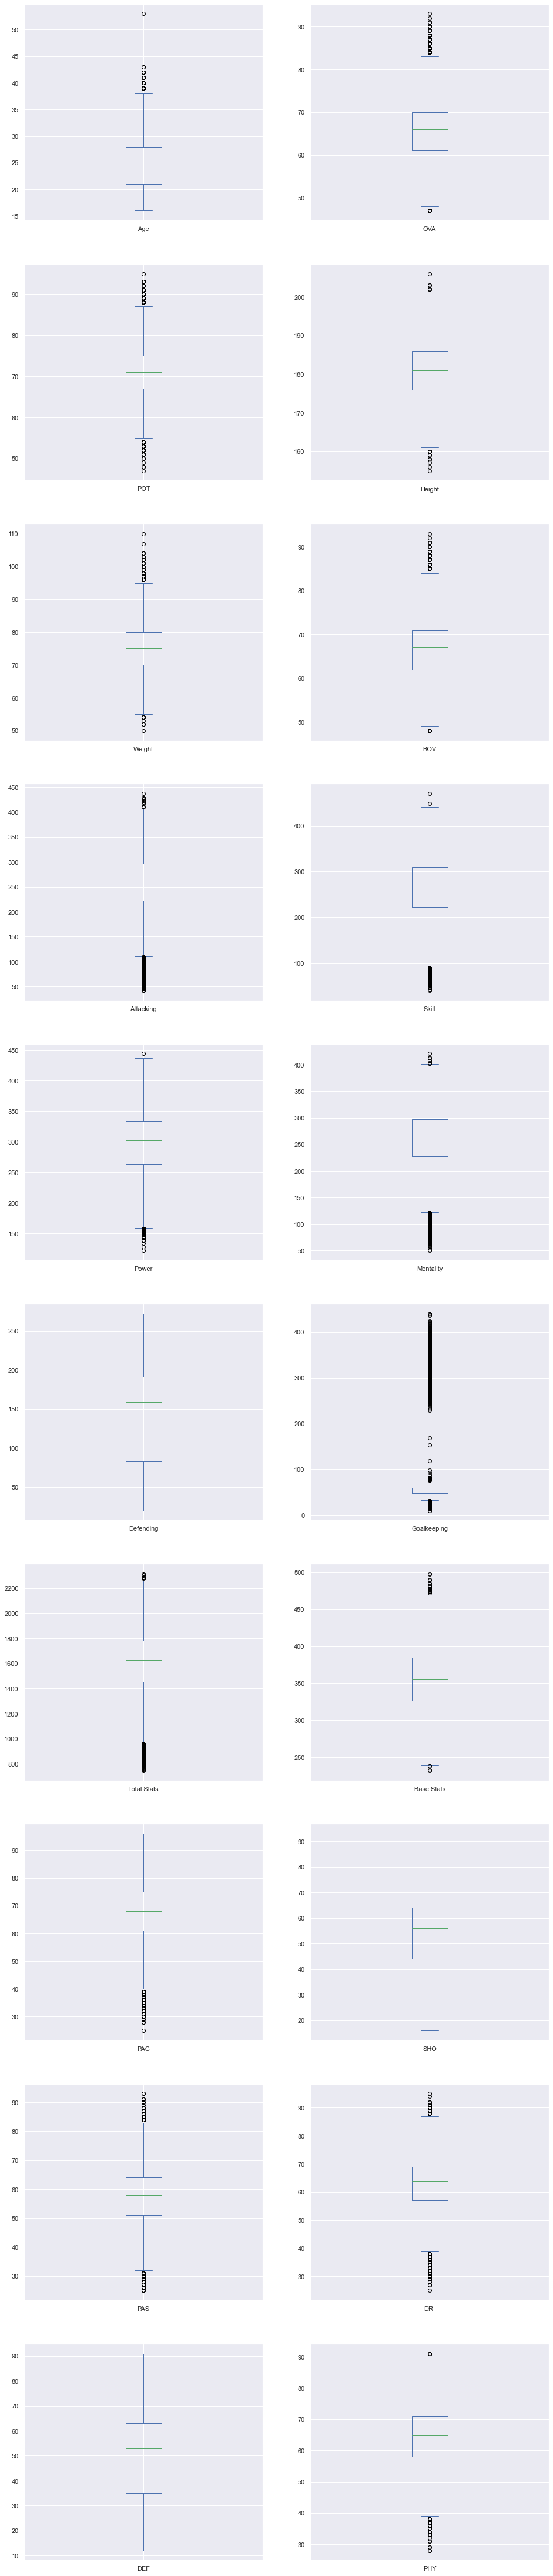

In [81]:
#Create a figure and axes
fix1,ax1 = plt.subplots(10,2,figsize=(16,80))

#Plot boxplot for the numerical variables
df_fifa["Age"].plot.box(ax=ax1[0][0])
df_fifa["OVA"].plot.box(ax=ax1[0][1])

df_fifa["POT"].plot.box(ax=ax1[1][0])
df_fifa["Height"].plot.box(ax=ax1[1][1])

df_fifa["Weight"].plot.box(ax=ax1[2][0])
df_fifa["BOV"].plot.box(ax=ax1[2][1])

df_fifa["Attacking"].plot.box(ax=ax1[3][0])
df_fifa["Skill"].plot.box(ax=ax1[3][1])

df_fifa["Power"].plot.box(ax=ax1[4][0])
df_fifa["Mentality"].plot.box(ax=ax1[4][1])

df_fifa["Defending"].plot.box(ax=ax1[5][0])
df_fifa["Goalkeeping"].plot.box(ax=ax1[5][1])

df_fifa["Total Stats"].plot.box(ax=ax1[6][0])
df_fifa["Base Stats"].plot.box(ax=ax1[6][1])

df_fifa["PAC"].plot.box(ax=ax1[7][0])
df_fifa["SHO"].plot.box(ax=ax1[7][1])

df_fifa["PAS"].plot.box(ax=ax1[8][0])
df_fifa["DRI"].plot.box(ax=ax1[8][1])

df_fifa["DEF"].plot.box(ax=ax1[9][0])
df_fifa["PHY"].plot.box(ax=ax1[9][1])



---

## Exploratory Data Analysis

### Descriptive statistics

In [82]:
df_fifa[['Age', 'OVA', 'POT', 'Club', 'BOV', 'Best Position', 'Attacking', 'Skill','Movement', 'Power','Mentality']].describe()

,Age,OVA,POT,BOV,Attacking,Skill,Movement,Power,Mentality
count,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000
mean,25.141981,65.679223,71.147583,66.719080,248.865543,256.400704,317.677569,296.509444,254.074699
std,4.693664,6.969582,6.113714,6.749744,74.182614,78.561620,55.886585,50.730653,64.533451
min,16.000000,47.000000,47.000000,48.000000,42.000000,40.000000,122.000000,122.000000,50.000000
25%,21.000000,61.000000,67.000000,62.000000,222.000000,222.000000,289.000000,264.000000,227.000000
50%,25.000000,66.000000,71.000000,67.000000,262.000000,269.000000,327.000000,302.000000,263.000000
75%,28.000000,70.000000,75.000000,71.000000,297.000000,310.000000,356.000000,334.000000,297.000000
max,53.000000,93.000000,95.000000,93.000000,437.000000,470.000000,464.000000,444.000000,421.000000


### Descriptive statistics

In [83]:
df_fifa[['Defending', 'Goalkeeping','Total Stats', 'Base Stats', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI','DEF', 'PHY']].describe()

,Defending,Goalkeeping,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000,18742.000000
mean,139.865543,81.263259,1594.656760,355.515153,67.438854,53.417938,57.639900,62.850763,49.831822,64.335877
std,61.125735,84.454008,269.769565,40.792055,10.681883,13.828914,10.092324,9.928971,16.431118,9.603485
min,20.000000,10.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,83.000000,48.000000,1452.000000,326.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,159.000000,53.000000,1626.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,191.000000,59.000000,1780.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,272.000000,440.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


### Descriptive statistics

In [84]:
df_fifa.describe(include='object')

,LongName,Nationality,Club,Positions,Best Position,A/W,D/W
count,18742,18742,18742,18742,18742,18742,18742
unique,18616,163,681,639,15,3,3
top,Diego Rodríguez,England,Brighton & Hove Albion,CB,CB,Medium,Medium
freq,3,1705,33,2415,3644,12536,13797


### Distribution of data

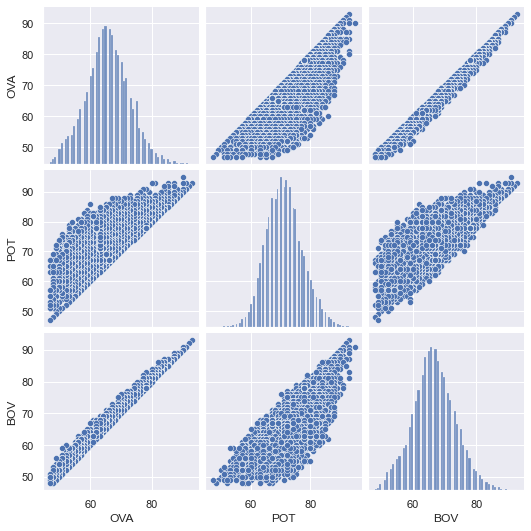

In [85]:
sns.pairplot(df_fifa[['OVA', 'POT', 'BOV']])

### Distribution of data

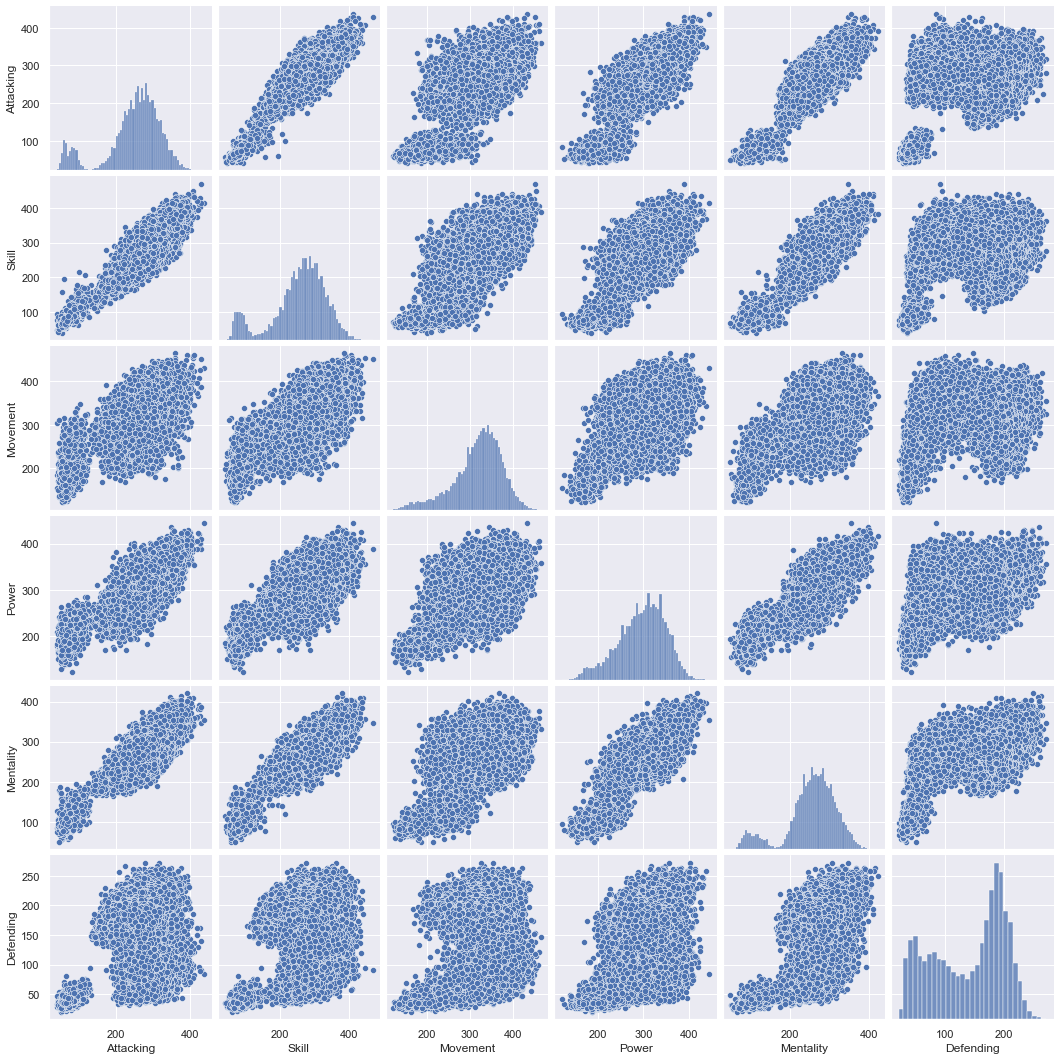

In [86]:
sns.pairplot(df_fifa[['Attacking', 'Skill','Movement', 'Power', 'Mentality', 'Defending']])

### Frequency of Total Statistics

<AxesSubplot:xlabel='Total Stats', ylabel='Count'>

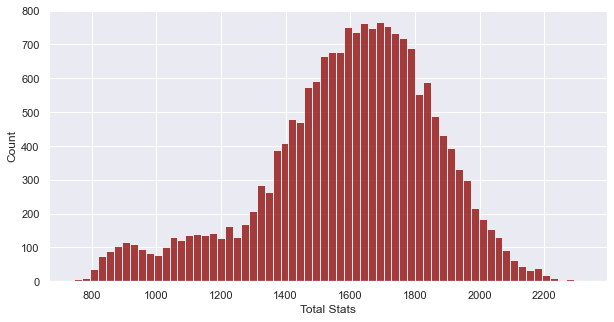

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(x=df_fifa['Total Stats'], data=df_fifa, color='darkred')

1. Location: The majority of the data is at 1600 to 1800.
2. Shape : Skewed-to-left.

### Overall Rating, Best Overall Rating and Potential of Player

<AxesSubplot:xlabel='BOV'>

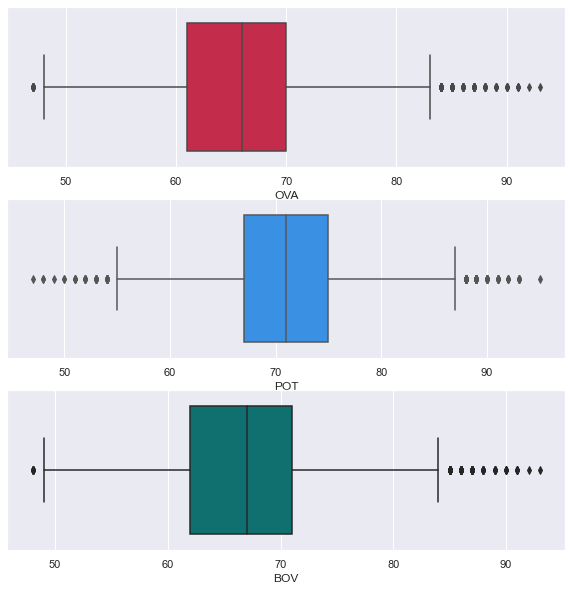

In [88]:
fix1,ax1 = plt.subplots(3,figsize=(10,10))

sns.boxplot(x=df_fifa['OVA'],data = df_fifa, ax=ax1[0], color='crimson')
sns.boxplot(x=df_fifa['POT'],data = df_fifa, ax=ax1[1], color='dodgerblue')
sns.boxplot(x=df_fifa['BOV'],data = df_fifa, ax=ax1[2], color='teal')

1. Location: The highest median is POT at around 72. The second highest median is around 67. The lowest median is OVA at around 66. All the boxes overlap.
2. Shape: The distribution for OVA and BOV is slightly skewed to the left while POT is approximately symmetrical.
3. Outliers: There are outliers in the upper and lower region in all of the boxplot. There lesser outliers in the lower region for OVA and BOV.
4. Spread: OVA and BOV has the biggest spread. POT has a lesser spread.

We didn't treat the outliers due to the nature of the dataset.

### Relationship between Market Value and Total Statistics 

<AxesSubplot:xlabel='Value-Bin', ylabel='Total Stats'>

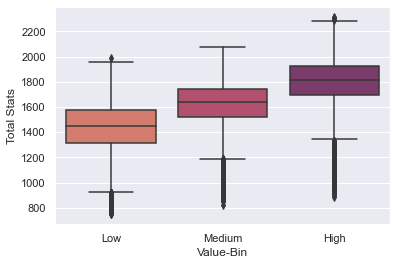

In [89]:
sns.boxplot(x="Value-Bin",y= "Total Stats",data= df_fifa, palette="flare")

The higher the Total Stats, the higher the market value.

### Relationship between Potential of the Player & Value and Wage

<AxesSubplot:xlabel='Wage-Bin', ylabel='POT'>

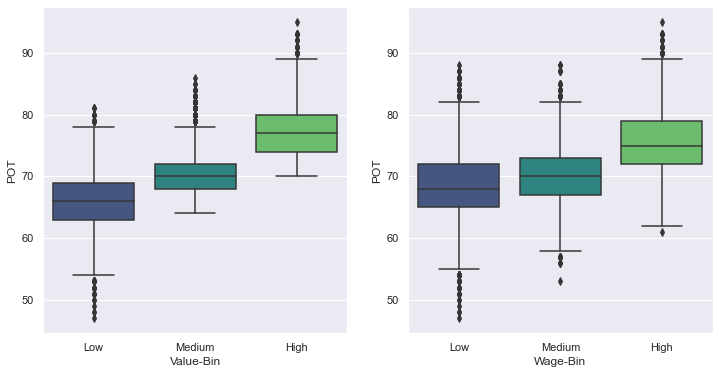

In [90]:
fix1,ax1 = plt.subplots(1,2,figsize=(12,6))

sns.boxplot(x="Value-Bin",y= "POT",data= df_fifa, ax=ax1[0], palette="viridis")
sns.boxplot(x="Wage-Bin",y= "POT",data= df_fifa, ax=ax1[1], palette="viridis")

1. The higher the POT, the higher the Wage. 
2. The higher the POT, the higher the Value.

##### POT against Value

1. Location: The highest median is the group 'High' at around 77. The second highest median is around 70. The lowest median is the group 'Low' at around 66. Only the 'Low' and 'Medium' group are overlapping.
2. Shape: The distribution for all of the group is approximately symmetrical.
3. Outliers: There are outliers in the upper and lower region in only the 'Low' group. There are upper outliers in the 'Medium' and 'High' group.
4. Spread: The 'Low' and 'High' group have about the same spread while the 'Medium' group has a lesser spread.

##### POT against Wage

1. Location: The highest median is the group 'High' at around 75. The second highest median is around 70. The lowest median is the group 'Low' at around 68. All of the boxes are overlapping.
2. Shape: The distribution for the 'High' group is skewed to the right while the rest are all approximately symmetrical.
3. Outliers: All of the group have upper and lower outliers.
4. Spread: The 'Low' and 'High' group have about the same spread while the 'Medium' group has a lesser spread.

### Correlation of the Data 

<AxesSubplot:>

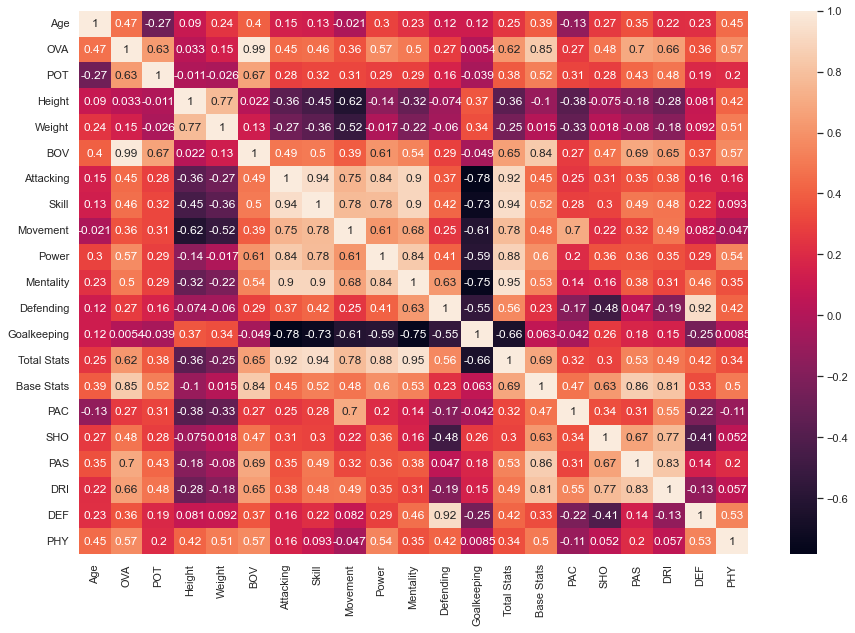

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df_fifa.corr(), annot=True)

---

## Data Mining/Data Modelling

##### Predictive question:
- What will be the market value of a certain FIFA player based on their total stats?

In [92]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [93]:
test_df = pd.get_dummies(df_fifa, columns = ['A/W','D/W','Wage-Bin'])
test_df.drop(['LongName','Nationality','Club', 'Positions', 'Best Position'], axis=1, inplace= True)
test_df


,Age,OVA,POT,Height,Weight,BOV,Attacking,Skill,Movement,Power,...,Value-Bin,A/W_High,A/W_Low,A/W_Medium,D/W_High,D/W_Low,D/W_Medium,Wage-Bin_Low,Wage-Bin_Medium,Wage-Bin_High
3943,40,71,71,181.00,80.000,71,256,265,262,277,...,Low,0,1,0,0,0,1,1,0,0
6347,40,69,69,174.00,72.000,69,269,281,334,301,...,Low,0,0,1,0,0,1,1,0,0
8171,40,67,67,180.00,76.000,67,224,193,236,279,...,Low,0,1,0,1,0,0,1,0,0
16109,53,59,59,177.00,72.000,60,289,290,187,235,...,Low,0,1,0,0,1,0,1,0,0
1083,42,77,77,180.00,78.000,77,308,310,247,321,...,Low,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,33,78,78,187.96,82.174,78,90,108,313,253,...,High,0,0,1,0,0,1,0,0,1
895,36,78,78,190.50,81.266,78,258,245,238,282,...,High,0,0,1,1,0,0,0,0,1
896,33,78,78,170.18,67.192,78,343,397,377,359,...,High,0,0,1,0,0,1,0,0,1
897,29,78,78,177.80,77.180,78,353,369,383,356,...,High,0,0,1,0,0,1,0,0,1


In [94]:
X = test_df.drop(["Value-Bin"], axis=1)
y = test_df["Value-Bin"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

##### Using the Support Vector Classifier

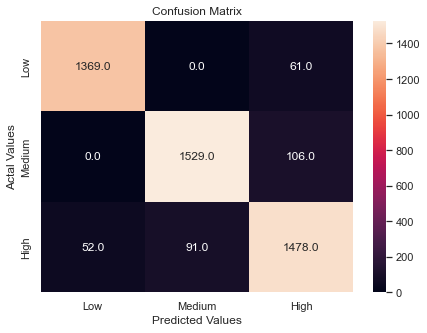

Precision: 0.934
Recall: 0.934
Accuracy: 0.934
Classification report : 
               precision    recall  f1-score   support

         Low       0.94      0.94      0.94      1635
      Medium       0.90      0.91      0.91      1621
        High       0.96      0.96      0.96      1430

    accuracy                           0.93      4686
   macro avg       0.94      0.93      0.93      4686
weighted avg       0.93      0.93      0.93      4686



In [95]:
#using the Support Vector Classifier
model = SVC(kernel = 'linear').fit(X_train,y_train)

model.predict(X_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                    index = ['Low', 'Medium', 'High'],
                    columns = ['Low', 'Medium', 'High'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

matrix = classification_report(y_test, y_pred,labels=['Low','Medium', 'High'])
print('Classification report : \n',matrix)

##### Using the Logistic Regression method

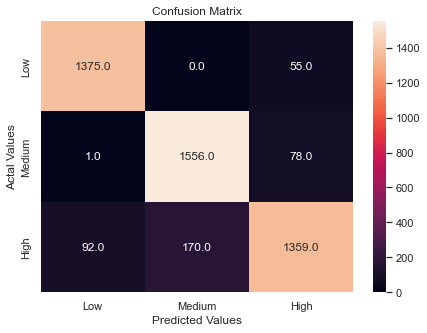

Precision: 0.915
Recall: 0.915
Accuracy: 0.915
Classification report : 
               precision    recall  f1-score   support

         Low       0.90      0.95      0.93      1635
      Medium       0.91      0.84      0.87      1621
        High       0.94      0.96      0.95      1430

    accuracy                           0.92      4686
   macro avg       0.92      0.92      0.92      4686
weighted avg       0.92      0.92      0.91      4686



In [96]:
#using the Logistic Regression
model2 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

model2.predict(X_train)
y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                    index = ['Low', 'Medium', 'High'],
                    columns = ['Low', 'Medium', 'High'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, fmt='.1f')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

matrix = classification_report(y_test, y_pred,labels=['Low','Medium', 'High'])
print('Classification report : \n',matrix)

Comparing both of the methods' accuracy, it looks like the Support Vector Machine is more accurate than the Logistic Regression method.

---

## Data Visualization

##### Descriptive Question:
- What are the top 10 FIFA players with the highest total stats?

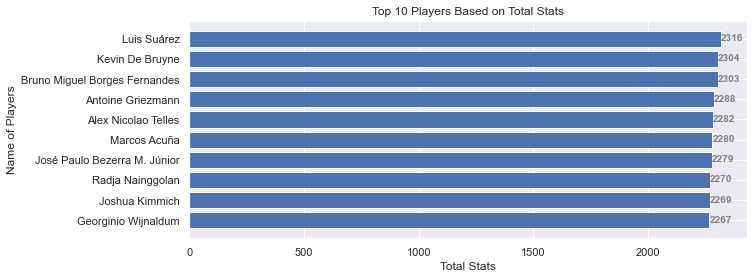

In [97]:
sorted_df = df_fifa.sort_values('Total Stats', ascending=False)

sorted_stats = sorted_df['Total Stats'].head(10)
name = sorted_df['LongName'].head(10)

fix1,ax1 = plt.subplots(figsize=(10,4))

ax1.barh(name, sorted_stats)
ax1.invert_yaxis()

for i in ax1.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.xlabel('Total Stats')
plt.ylabel('Name of Players')
plt.title('Top 10 Players Based on Total Stats')
plt.show()

It is clear that the number 1 player (based on total stats) is Luis Suárez with his total stats at 2316, followed by Kevin De Bruyne and Bruno Miguel Borges Fernandes with 2304 and 2303 respectively. The lowest in the top 10 is Georginio Wijnaldum with 2267.


##### Exploratory Question:
- What is the relationship between the overall rating of a player and the potential of a player?

<AxesSubplot:>

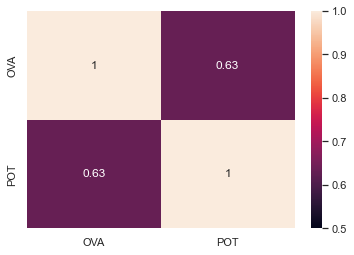

In [98]:
corr_ova_pot = df_fifa[['OVA','POT']].corr()
sns.heatmap(corr_ova_pot, vmin=0.5, vmax=1, annot=True)

Based on the heatmap above, we can observe that the overall rating of a player (OVA) and potential of a player (POT) has a moderate positive correlation.

<AxesSubplot:xlabel='OVA', ylabel='POT'>

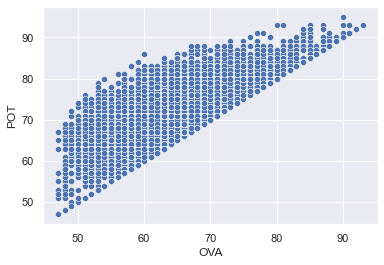

In [99]:
sns.scatterplot(x="OVA",y="POT",data=df_fifa)

Based on the scatterplot above, we can observe that as the overall rating of a player (OVA) increases, the potential of a player (POT) increases as well. Moreover, it can be seen that POT is always equal or more than OVA.

To deduce, we can see that there is a moderate positive relationship between the overall rating of a player (OVA) and potential of a player (POT).

##### Inferential Question:
- The higher the average overall rating of a player, the higher the average potential of a player for the top 3 clubs with the highest total statistics.


    Is this true for the other top 50 clubs with the highest total statistics?

C:\Users\Deivashree\AppData\Local\Temp\ipykernel_24072\2316840450.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  club_stats = df_fifa.groupby('Club')['Total Stats','OVA','POT'].mean()


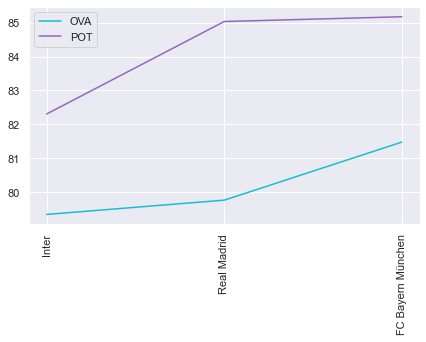

In [100]:
#Verifying the average of overall rating and potential of a player for the top 3 clubs with the highest total statistics.
club_stats = df_fifa.groupby('Club')['Total Stats','OVA','POT'].mean()
club_stats.sort_values(['Total Stats'], ascending=[False], inplace=True)
toptenstats = club_stats.head(10).copy()
toptenstats.sort_values(['OVA','POT'], ascending=[True,True], inplace=True)

fig1,ax1 = plt.subplots(figsize=(7,4))
topthreestats = toptenstats.iloc[7:]
topthreestats.reset_index(inplace=True)
topthreestats[['OVA','POT']].plot(kind='line',ax=ax1, color=['tab:cyan', 'tab:purple'])
ax1.set_xticks(np.arange(len(topthreestats['OVA'])))
ax1.set_xticklabels(topthreestats['Club'], rotation = 90)
plt.show()

The line graph above shows that the higher the average overall rating of the player (OVA), the higher the average potential of the player (POT) for the top 3 clubs with the highest total statistics. Hence, the hypothesis is proven.

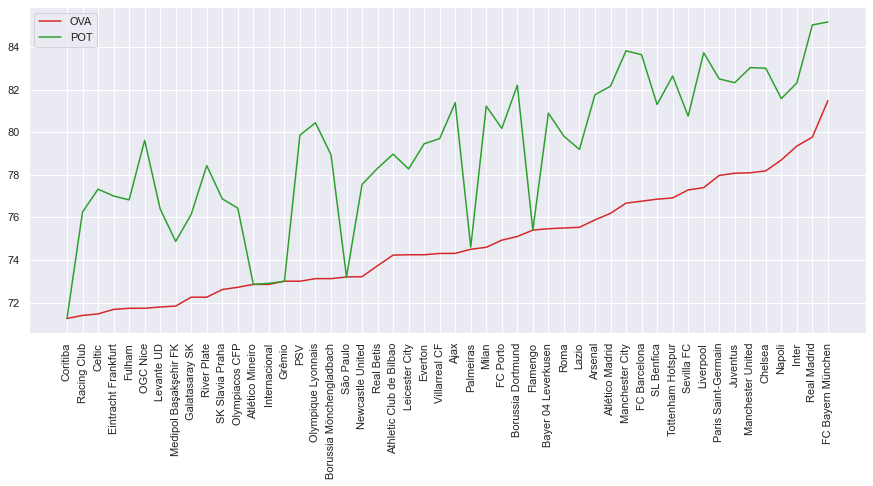

In [101]:
#Check if this is true for the other top 50 clubs with the highest total statistics
topfiftystats = club_stats.head(50).copy()
topfiftystats.sort_values(['OVA','POT'], ascending=[True,True], inplace=True)
topfiftystats.reset_index(inplace=True)

fig1,ax1 = plt.subplots(figsize=(15,6))
topfiftystats[['OVA','POT']].plot(kind='line',ax=ax1, color=['tab:red', 'tab:green'])
ax1.set_xticks(np.arange(len(topfiftystats['OVA'])))
ax1.set_xticklabels(topfiftystats['Club'], rotation = 90)
plt.show()

As the average overall rating of the player increases, it can be seen that the average potential of the player varies by either decreasing in value or being equal to the average overall rating of the player. Hence, it is not true for the other top 50 clubs with the highest total statistics.


##### Causal question:
- Will an increase in potential of a player increase their market value?

<AxesSubplot:xlabel='Value-Bin', ylabel='POT'>

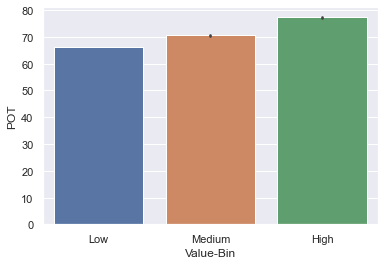

In [102]:
sns.barplot(x="Value-Bin",y="POT",data=df_fifa)

From the generated graph,the higher the potential of a player, the higher the market value.

##### Mechanistic question:
- How can the increase in the potential of a player affect their wages?

<AxesSubplot:>

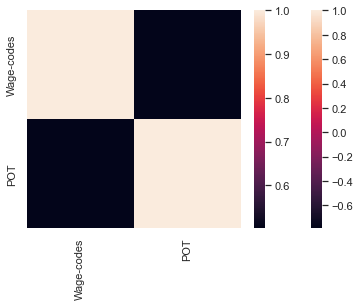

In [103]:
df_fifa["Wage-codes"]= df_fifa["Wage-Bin"].cat.codes

sns.heatmap(df_fifa.corr())
sns.heatmap(df_fifa[["Wage-codes","POT"]].corr())


- From the correlation heatmap, we can see that Wages-codes have a positive correlation with POT

<AxesSubplot:xlabel='Wage-Bin', ylabel='POT'>

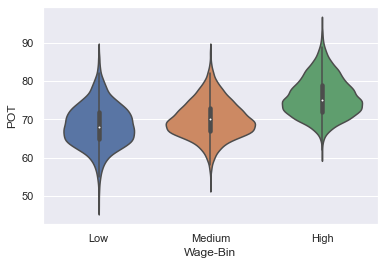

In [104]:
sns.violinplot(x="Wage-Bin",y="POT",data= df_fifa)


- This is proven from the violin plot that the average player will have a POT of 70 and players with a POT of 70 tend to have a higher wage compared to players who have POT lesser than 70.